In [2]:
!uv pip install seaborn


Using Python 3.13.3 environment at: /Users/sebastianholmberg/Python_Kunskapskontroll/diamonds_analys/.venv
Resolved 15 packages in 113ms                                        
Installed 1 package in 3ms                                  
 + seaborn==0.13.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diamonds.csv')

In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Det fanns en del diamanter som hade 0 värde i X, Y , Z kolumnerna och dom behvöer vi ta bort. Och där var en diamant som var alldeles för stor enligt proportioner. Så det har vi behövt att tvätta. 

In [11]:
df = df[(df.y < 30) & (df.z < 30) & (df.x > 0) & ( df.z > 0) & (df.z > 0)].copy()

In [12]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409
std,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


Del 1:
Skapa en översikt av våra diamanter och dess statistik!

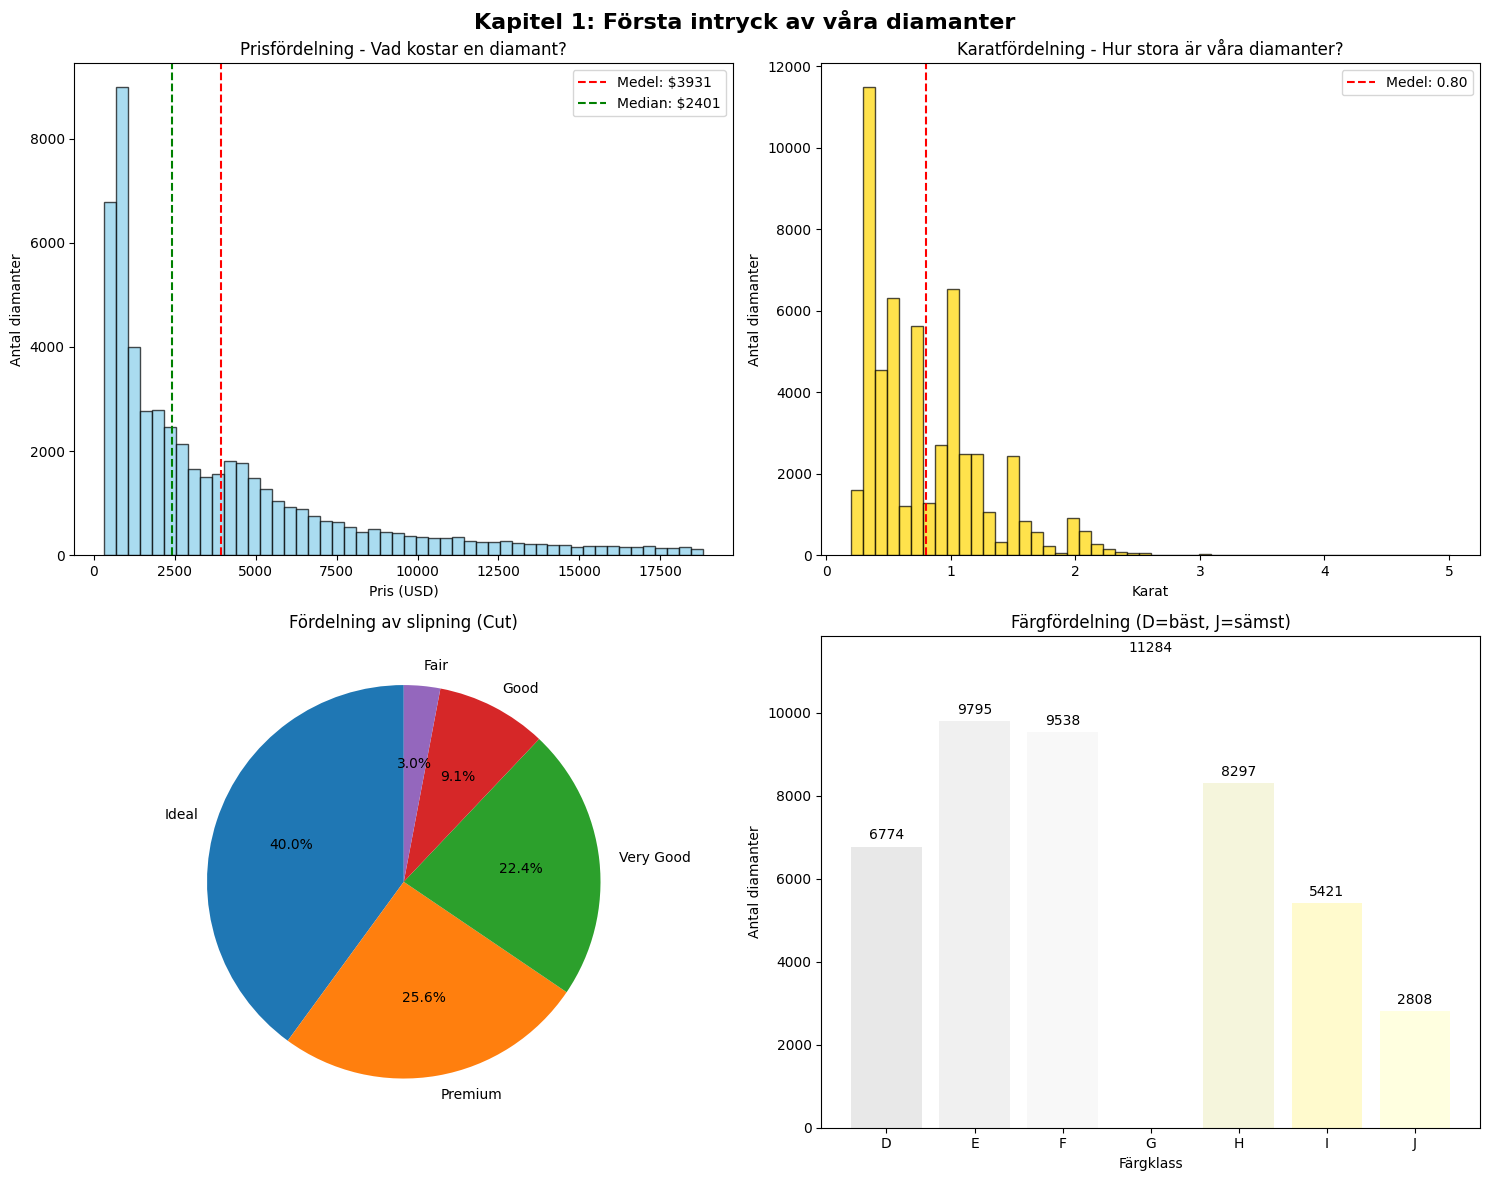

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Del 1: Första intryck av våra diamanter', fontsize=16, fontweight='bold')

# Prisfördelning
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Prisfördelning - Vad kostar en diamant?')
axes[0,0].set_xlabel('Pris (USD)')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Medel: ${df["price"].mean():.0f}')
axes[0,0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():.0f}')
axes[0,0].legend()

# Karatfördelning
axes[0,1].hist(df['carat'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[0,1].set_title('Karatfördelning - Hur stora är våra diamanter?')
axes[0,1].set_xlabel('Karat')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].axvline(df['carat'].mean(), color='red', linestyle='--', label=f'Medel: {df["carat"].mean():.2f}')
axes[0,1].legend()

# Cut fördelning
cut_counts = df['cut'].value_counts()
axes[1,0].pie(cut_counts.values, labels=cut_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Fördelning av slipning (Cut)')

# Color fördelning
color_counts = df['color'].value_counts().sort_index()
bars = axes[1,1].bar(color_counts.index, color_counts.values, 
                     color=['#E8E8E8', '#F0F0F0', '#F8F8F8', '#FFFFFF', '#F5F5DC', '#FFFACD', '#FFFFE0'])
axes[1,1].set_title('Färgfördelning (D=bäst, J=sämst)')
axes[1,1].set_xlabel('Färgklass')
axes[1,1].set_ylabel('Antal diamanter')


for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 100,
                   f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Del 2:
Djupdykningen inom pris och vad som påverkar priset. 

In [24]:
print("Korrelation mellan numeriska variabler och pris:")
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix['price'].sort_values(ascending=False))


Korrelation mellan numeriska variabler och pris:
price    1.000000
carat    0.921586
y        0.888818
x        0.887221
z        0.882107
table    0.127241
depth   -0.010653
Name: price, dtype: float64


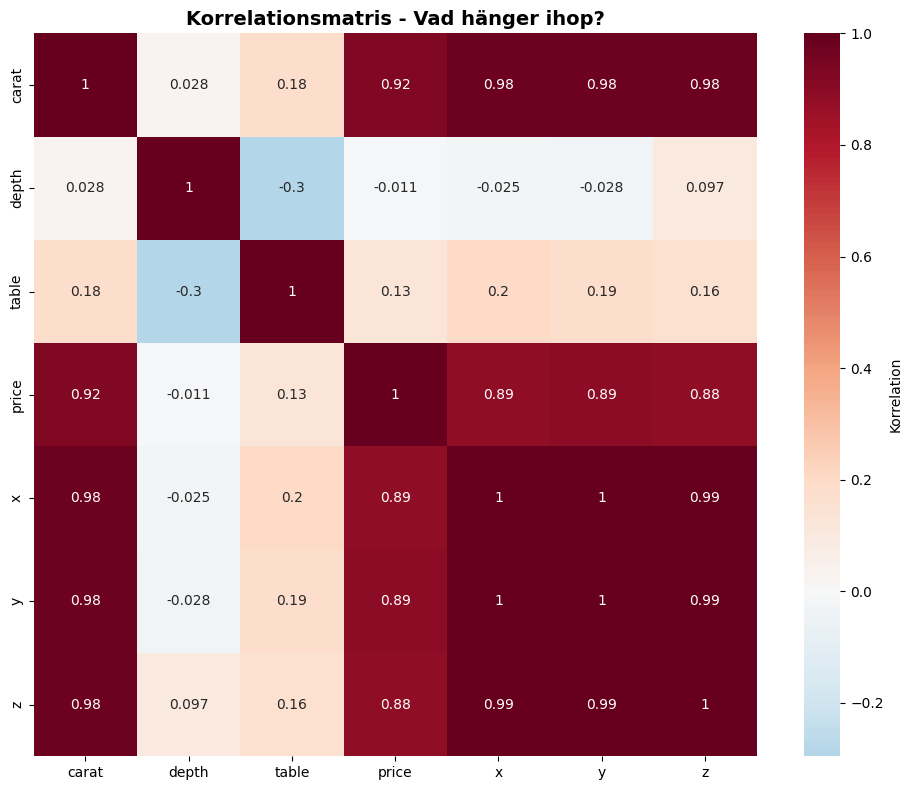

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, cbar_kws={'label': 'Korrelation'})
plt.title('Korrelationsmatris - Vad hänger ihop?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

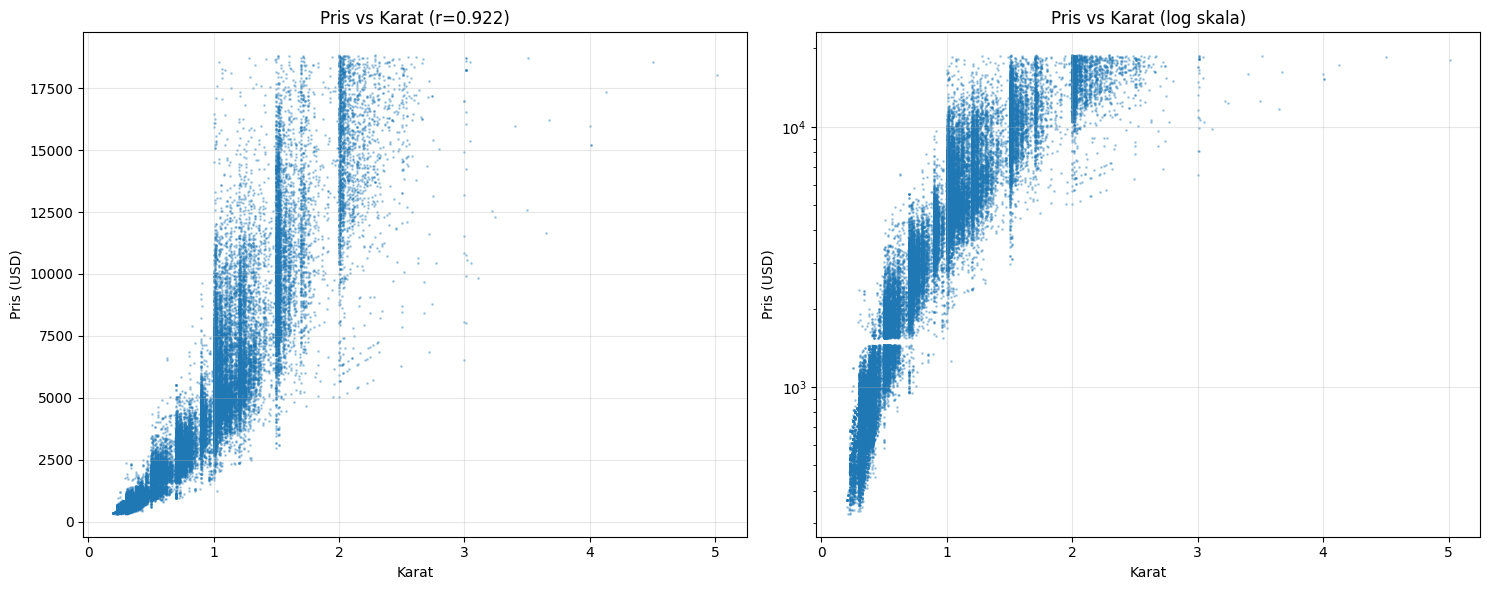

In [27]:
# Pris vs Karat (Starkaste korrelation)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(df['carat'], df['price'], alpha=0.3, s=1)
ax1.set_xlabel('Karat')
ax1.set_ylabel('Pris (USD)')
ax1.set_title(f'Pris vs Karat (r={correlation_matrix.loc["price", "carat"]:.3f})')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['carat'], df['price'], alpha=0.3, s=1)
ax2.set_xlabel('Karat')
ax2.set_ylabel('Pris (USD)')
ax2.set_yscale('log')
ax2.set_title('Pris vs Karat (log skala)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

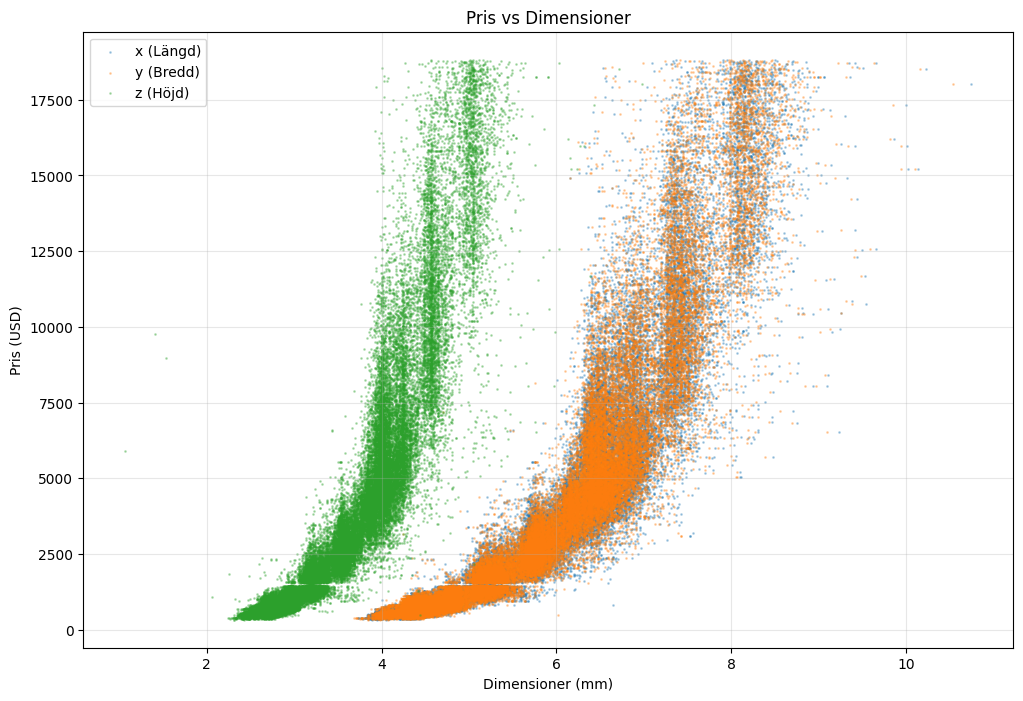

In [28]:
# Pris vs dimensioner

plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['price'], alpha=0.3, s=1, label='x (Längd)')
plt.scatter(df['y'], df['price'], alpha=0.3, s=1, label='y (Bredd)')
plt.scatter(df['z'], df['price'], alpha=0.3, s=1, label='z (Höjd)')
plt.xlabel('Dimensioner (mm)')
plt.ylabel('Pris (USD)')
plt.title('Pris vs Dimensioner')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


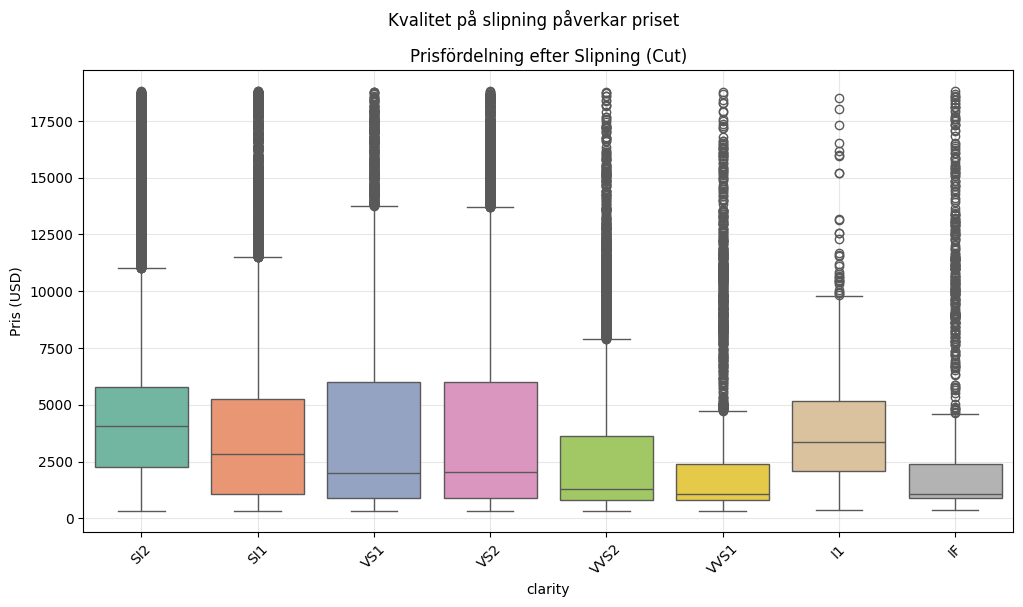

In [35]:
# Pris vs Cut
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning efter Slipning (Cut)')
plt.suptitle('Kvalitet på slipning påverkar priset')
plt.xticks(rotation=45)
plt.ylabel('Pris (USD)')
plt.grid(True, alpha=0.3)
plt.show()

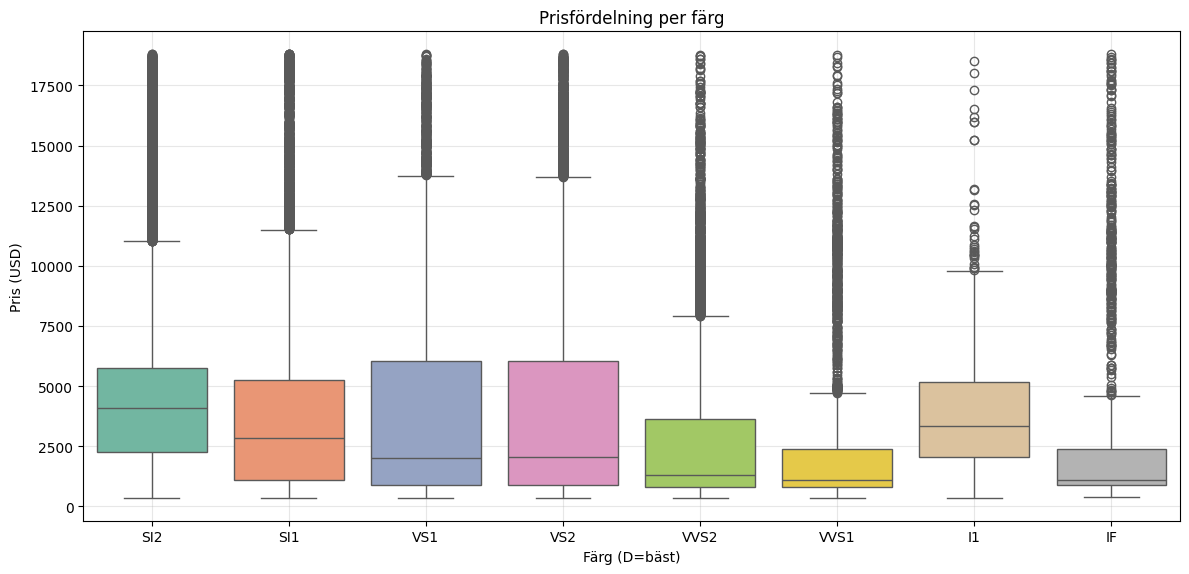

In [36]:
#Pris vs Color
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning per färg')
plt.suptitle('')
plt.xlabel('Färg (D=bäst)')
plt.ylabel('Pris (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

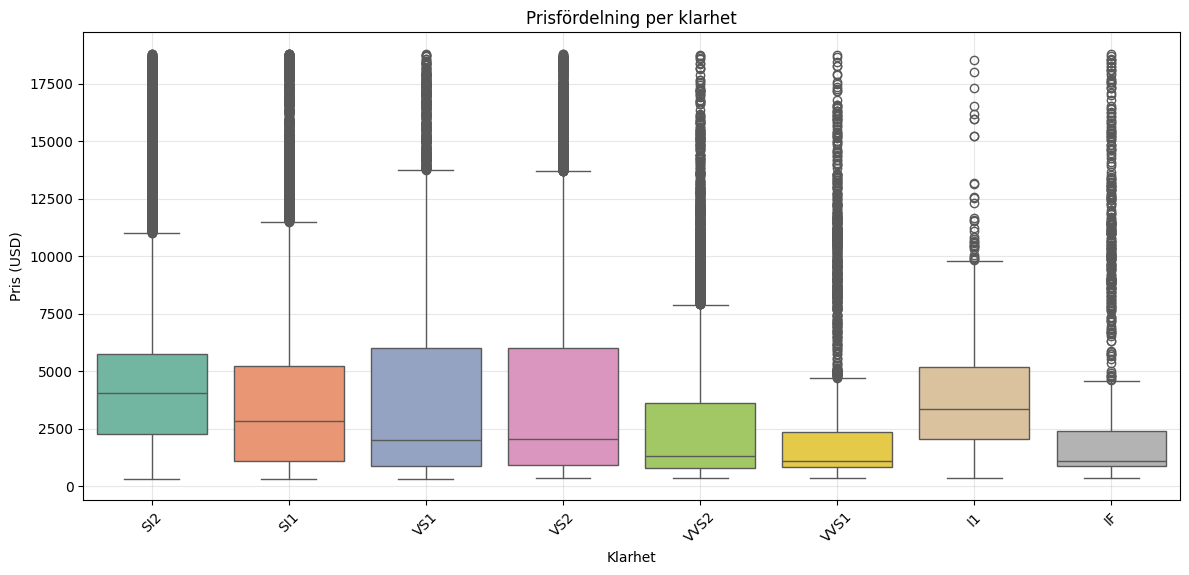

In [47]:
# Pris vs Clarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning per klarhet')
plt.suptitle('')
plt.xlabel('Klarhet')
plt.ylabel('Pris (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Del 3:
Analysera Cut, Clarity, Color & Carat 

In [39]:
print("Genomsnittligt pris per kategori:")
print("\n CUT (Slipning):")
cut_analysis = df.groupby('cut').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
cut_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(cut_analysis.sort_values('Medelpris', ascending=False))

print("\n COLOR (Färg):")
color_analysis = df.groupby('color').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
color_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(color_analysis.sort_values('Medelpris', ascending=False))

print("\n CLARITY (Klarhet):")
clarity_analysis = df.groupby('clarity').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
clarity_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(clarity_analysis.sort_values('Medelpris', ascending=False))

Genomsnittligt pris per kategori:

 CUT (Slipning):
           Medelpris  Medianpris  Antal  Medelkarat
cut                                                
Premium      4579.13      3181.0  13779        0.89
Fair         4357.50      3282.0   1609        1.05
Very Good    3981.83      2648.0  12080        0.81
Good         3926.40      3050.5   4902        0.85
Ideal        3457.01      1809.0  21547        0.70

 COLOR (Färg):
       Medelpris  Medianpris  Antal  Medelkarat
color                                          
J        5323.82      4234.0   2808        1.16
I        5089.97      3730.0   5421        1.03
H        4480.01      3453.0   8297        0.91
G        3996.88      2240.0  11284        0.77
F        3725.08      2343.5   9538        0.74
D        3168.11      1836.5   6774        0.66
E        3076.97      1738.0   9795        0.66

 CLARITY (Klarhet):
         Medelpris  Medianpris  Antal  Medelkarat
clarity                                          
SI2        5059

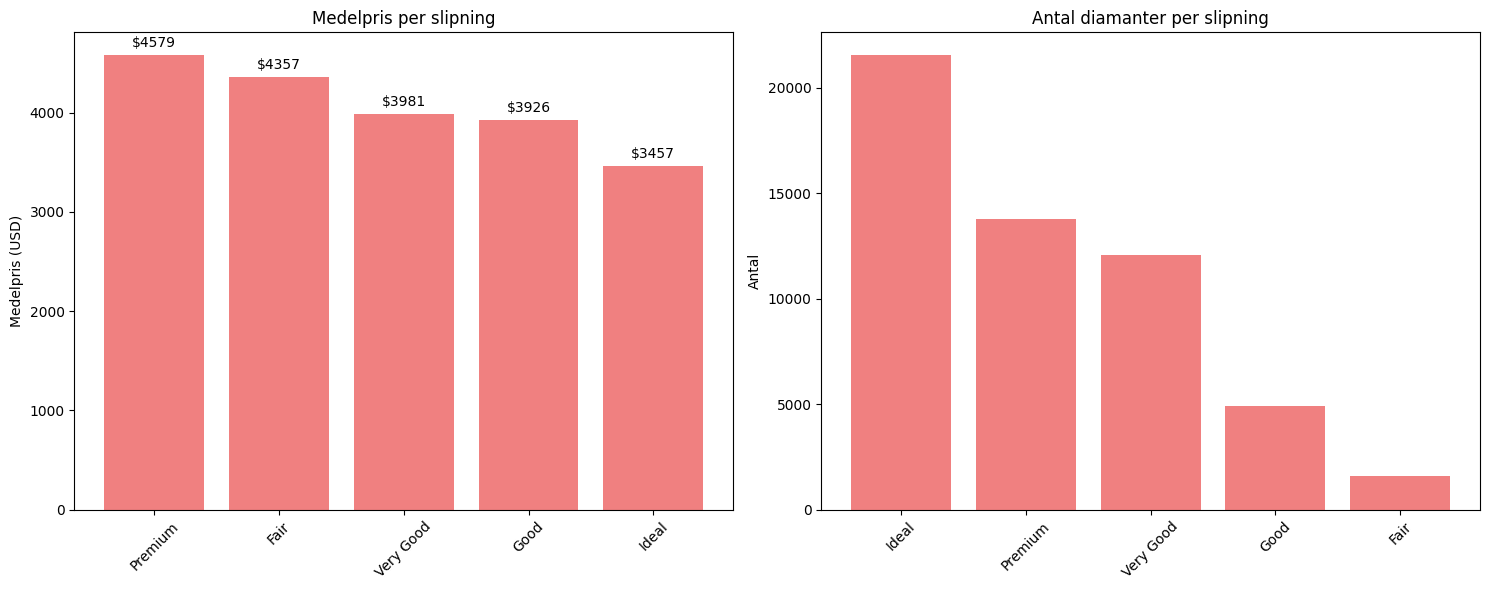

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


cut_price = df.groupby('cut')['price'].mean().sort_values(ascending=False)
bars1 = ax1.bar(cut_price.index, cut_price.values, color='lightcoral')
ax1.set_title('Medelpris per slipning')
ax1.set_ylabel('Medelpris (USD)')
ax1.tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


cut_count = df['cut'].value_counts()
ax2.bar(cut_count.index, cut_count.values, color='lightcoral')
ax2.set_title('Antal diamanter per slipning')
ax2.set_ylabel('Antal')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

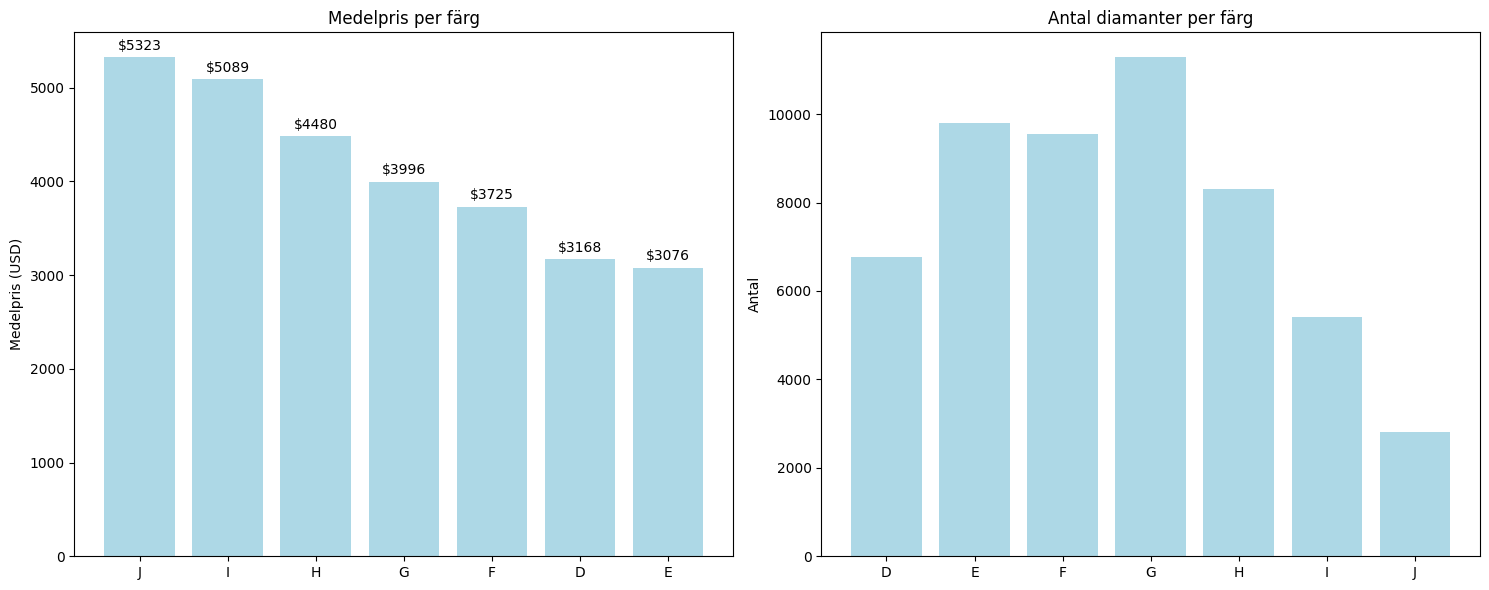

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


color_price = df.groupby('color')['price'].mean().sort_values(ascending=False)
bars2 = ax1.bar(color_price.index, color_price.values, color='lightblue')
ax1.set_title('Medelpris per färg')
ax1.set_ylabel('Medelpris (USD)')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


color_count = df['color'].value_counts().sort_index()
ax2.bar(color_count.index, color_count.values, color='lightblue')
ax2.set_title('Antal diamanter per färg')
ax2.set_ylabel('Antal')

plt.tight_layout()
plt.show()

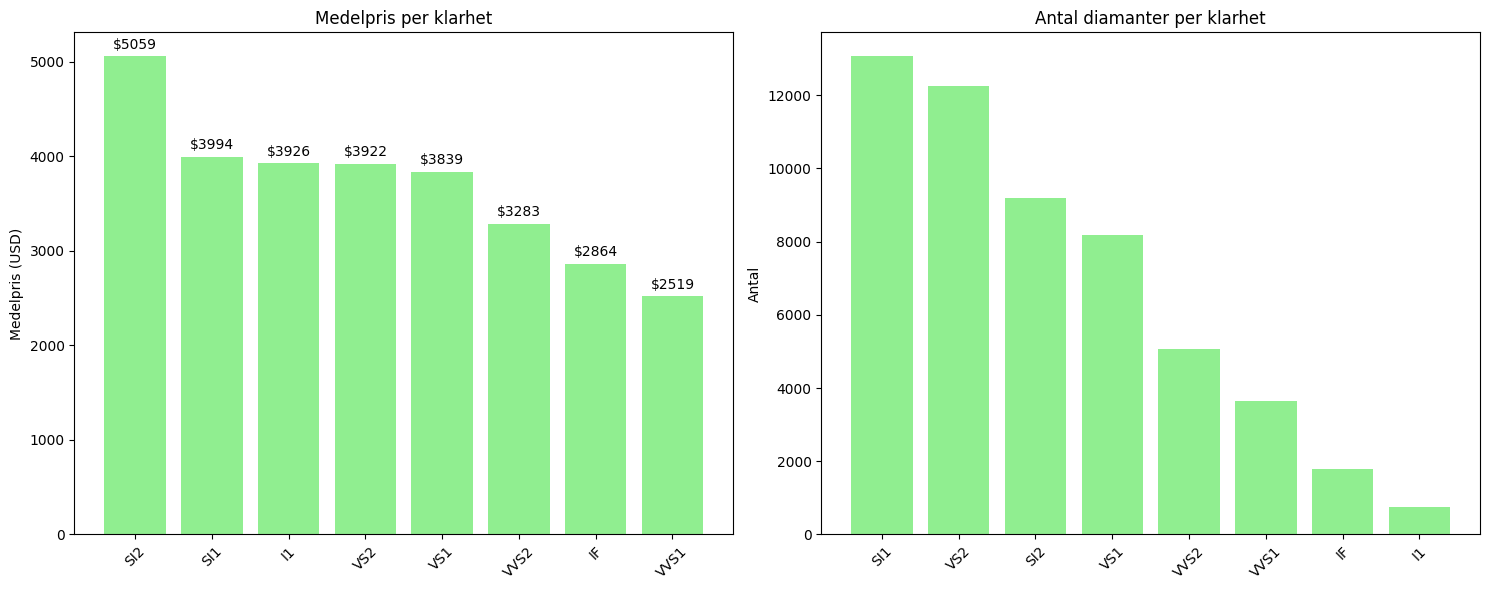

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


clarity_price = df.groupby('clarity')['price'].mean().sort_values(ascending=False)
bars3 = ax1.bar(clarity_price.index, clarity_price.values, color='lightgreen')
ax1.set_title('Medelpris per klarhet')
ax1.set_ylabel('Medelpris (USD)')
ax1.tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


clarity_count = df['clarity'].value_counts()
ax2.bar(clarity_count.index, clarity_count.values, color='lightgreen')
ax2.set_title('Antal diamanter per klarhet')
ax2.set_ylabel('Antal')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


⚖️ CARAT ANALYS:
Prisfördelning per karat-intervall:
                 price        carat
                  mean  count  mean
carat                              
(0.2, 0.68]    1068.90  25153  0.40
(0.68, 1.16]   4321.61  18615  0.91
(1.16, 1.64]   8709.83   7126  1.38
(1.64, 2.12]  13757.16   2347  1.92
(2.12, 2.6]   15237.26    610  2.28
(2.6, 3.09]   14439.21     52  2.85
(3.09, 3.57]  13653.33      6  3.33
(3.57, 4.05]  14858.20      5  3.87
(4.05, 4.53]  17930.00      2  4.31
(4.53, 5.01]  18018.00      1  5.01


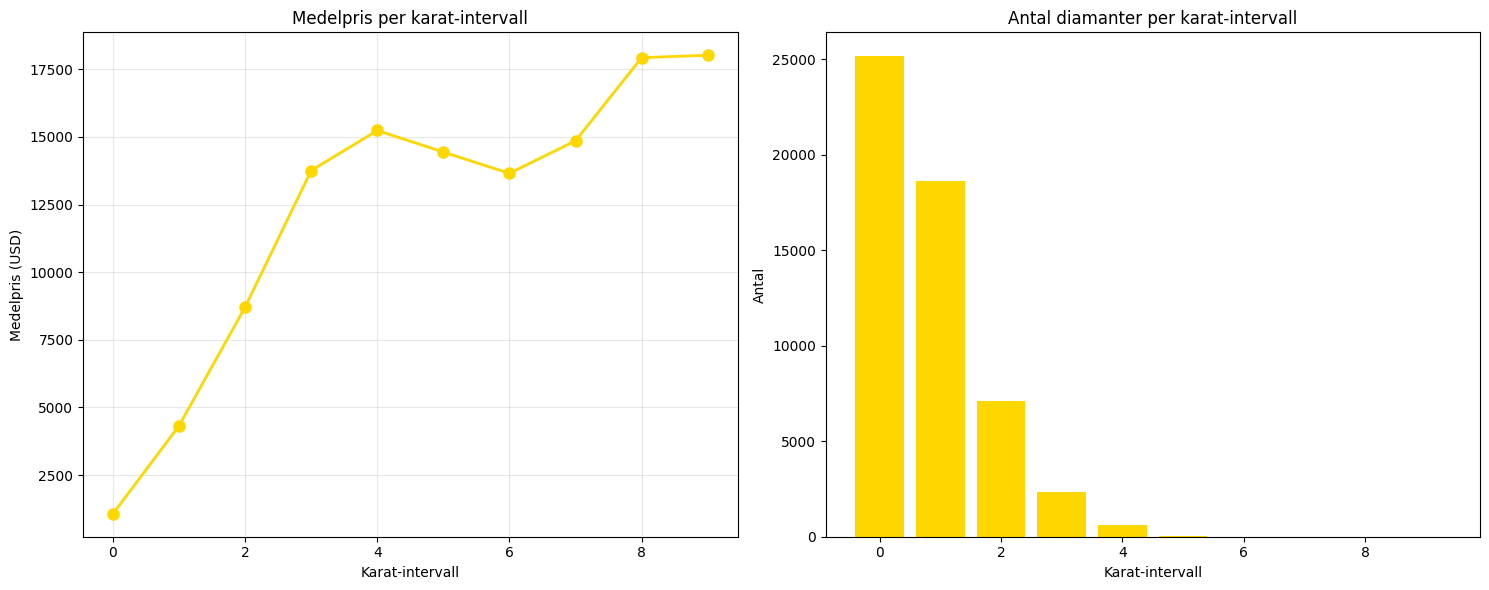

In [44]:
carat_bins = pd.cut(df['carat'], bins=10, precision=2)
carat_analysis = df.groupby(carat_bins, observed=False).agg({
    'price': ['mean', 'count'],
    'carat': 'mean'
}).round(2)

print("\n⚖️ CARAT ANALYS:")
print("Prisfördelning per karat-intervall:")
print(carat_analysis)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


carat_price = df.groupby(carat_bins, observed=False)['price'].mean()
ax1.plot(range(len(carat_price)), carat_price.values, marker='o', color='gold', linewidth=2, markersize=8)
ax1.set_title('Medelpris per karat-intervall')
ax1.set_ylabel('Medelpris (USD)')
ax1.set_xlabel('Karat-intervall')
ax1.grid(True, alpha=0.3)


carat_count = df.groupby(carat_bins, observed=False).size()
ax2.bar(range(len(carat_count)), carat_count.values, color='gold')
ax2.set_title('Antal diamanter per karat-intervall')
ax2.set_ylabel('Antal')
ax2.set_xlabel('Karat-intervall')

plt.tight_layout()
plt.show()

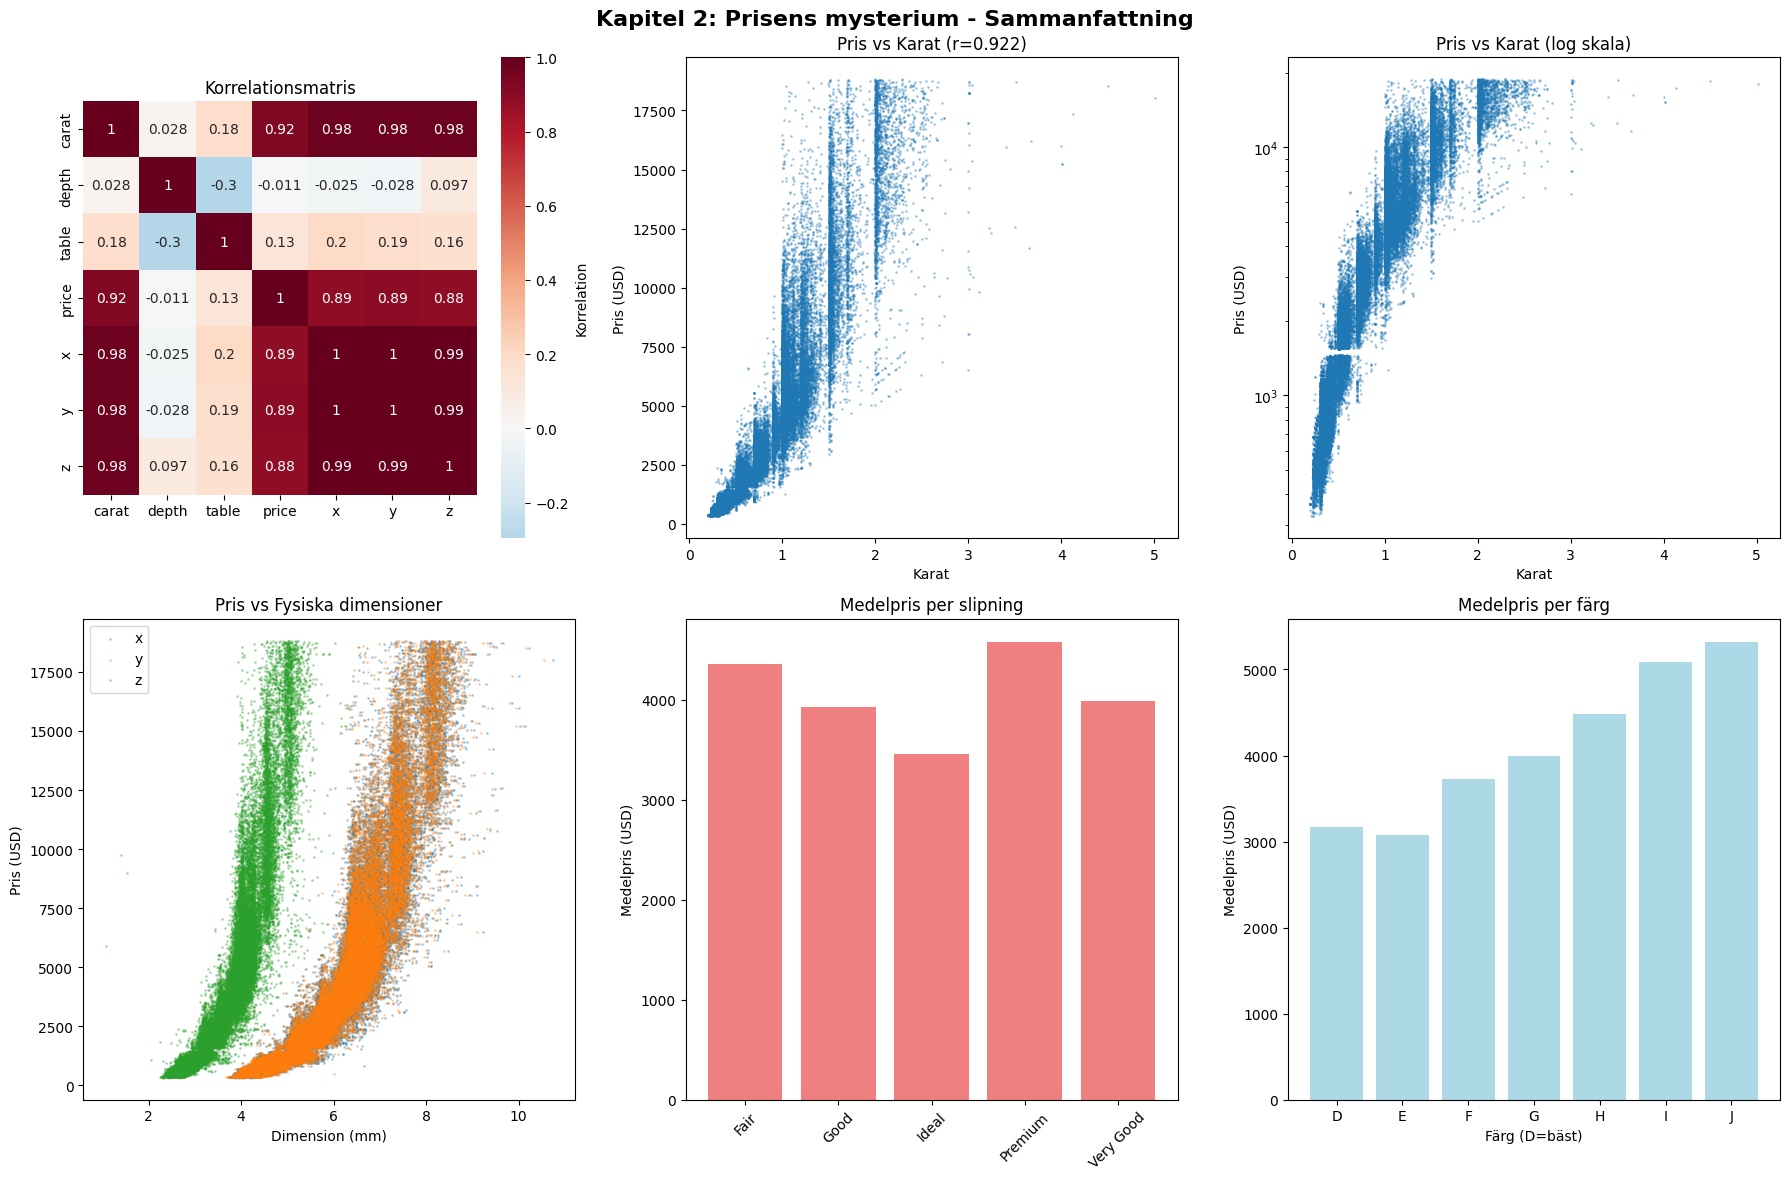

In [52]:
# Sammanfattande visualisering av korrelationer
plt.figure(figsize=(18, 12))

# Subplot 1: Korrelationsheatmap
plt.subplot(2, 3, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, cbar_kws={'label': 'Korrelation'})
plt.title('Korrelationsmatris')

# Subplot 2: Pris vs Karat
plt.subplot(2, 3, 2)
plt.scatter(df['carat'], df['price'], alpha=0.3, s=1)
plt.xlabel('Karat')
plt.ylabel('Pris (USD)')
plt.title(f'Pris vs Karat (r={correlation_matrix.loc["price", "carat"]:.3f})')

# Subplot 3: Pris vs Karat (log)
plt.subplot(2, 3, 3)
plt.scatter(df['carat'], df['price'], alpha=0.3, s=1)
plt.xlabel('Karat')
plt.ylabel('Pris (USD)')
plt.yscale('log')
plt.title('Pris vs Karat (log skala)')

# Subplot 4: Dimensioner
plt.subplot(2, 3, 4)
plt.scatter(df['x'], df['price'], alpha=0.3, s=1, label='x')
plt.scatter(df['y'], df['price'], alpha=0.3, s=1, label='y')
plt.scatter(df['z'], df['price'], alpha=0.3, s=1, label='z')
plt.xlabel('Dimension (mm)')
plt.ylabel('Pris (USD)')
plt.title('Pris vs Fysiska dimensioner')
plt.legend()

# Subplot 5: Cut medelpris
plt.subplot(2, 3, 5)
cut_price = df.groupby('cut')['price'].mean()
plt.bar(cut_price.index, cut_price.values, color='lightcoral')
plt.title('Medelpris per slipning')
plt.xticks(rotation=45)
plt.ylabel('Medelpris (USD)')

# Subplot 6: Color medelpris
plt.subplot(2, 3, 6)
color_price = df.groupby('color')['price'].mean()
plt.bar(color_price.index, color_price.values, color='lightblue')
plt.title('Medelpris per färg')
plt.xlabel('Färg (D=bäst)')
plt.ylabel('Medelpris (USD)')

plt.suptitle('Kapitel 2: Prisens mysterium - Sammanfattning', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [53]:
# Beräkna volym och andra geometriska mått
df['volume'] = df['x'] * df['y'] * df['z']
df['surface_area_approx'] = 2 * (df['x']*df['y'] + df['y']*df['z'] + df['x']*df['z'])
df['aspect_ratio_xy'] = df['x'] / df['y']
df['aspect_ratio_xz'] = df['x'] / df['z']

print("Geometriska statistik:")
print(f"Genomsnittlig volym: {df['volume'].mean():.2f} mm³")
print(f"Genomsnittlig yta (approx): {df['surface_area_approx'].mean():.2f} mm²")
print(f"Genomsnittlig depth: {df['depth'].mean():.2f}%")
print(f"Genomsnittlig table: {df['table'].mean():.2f}%")
print(f"Genomsnittlig x/y ratio: {df['aspect_ratio_xy'].mean():.3f}")

# Grundläggande geometrisk statistik
print(f"\nDimensionsstatistik:")
print(f"X (längd): {df['x'].mean():.2f} ± {df['x'].std():.2f} mm")
print(f"Y (bredd): {df['y'].mean():.2f} ± {df['y'].std():.2f} mm") 
print(f"Z (höjd): {df['z'].mean():.2f} ± {df['z'].std():.2f} mm")

Geometriska statistik:
Genomsnittlig volym: 129.80 mm³
Genomsnittlig yta (approx): 152.42 mm²
Genomsnittlig depth: 61.75%
Genomsnittlig table: 57.46%
Genomsnittlig x/y ratio: 0.999

Dimensionsstatistik:
X (längd): 5.73 ± 1.12 mm
Y (bredd): 5.73 ± 1.11 mm
Z (höjd): 3.54 ± 0.69 mm


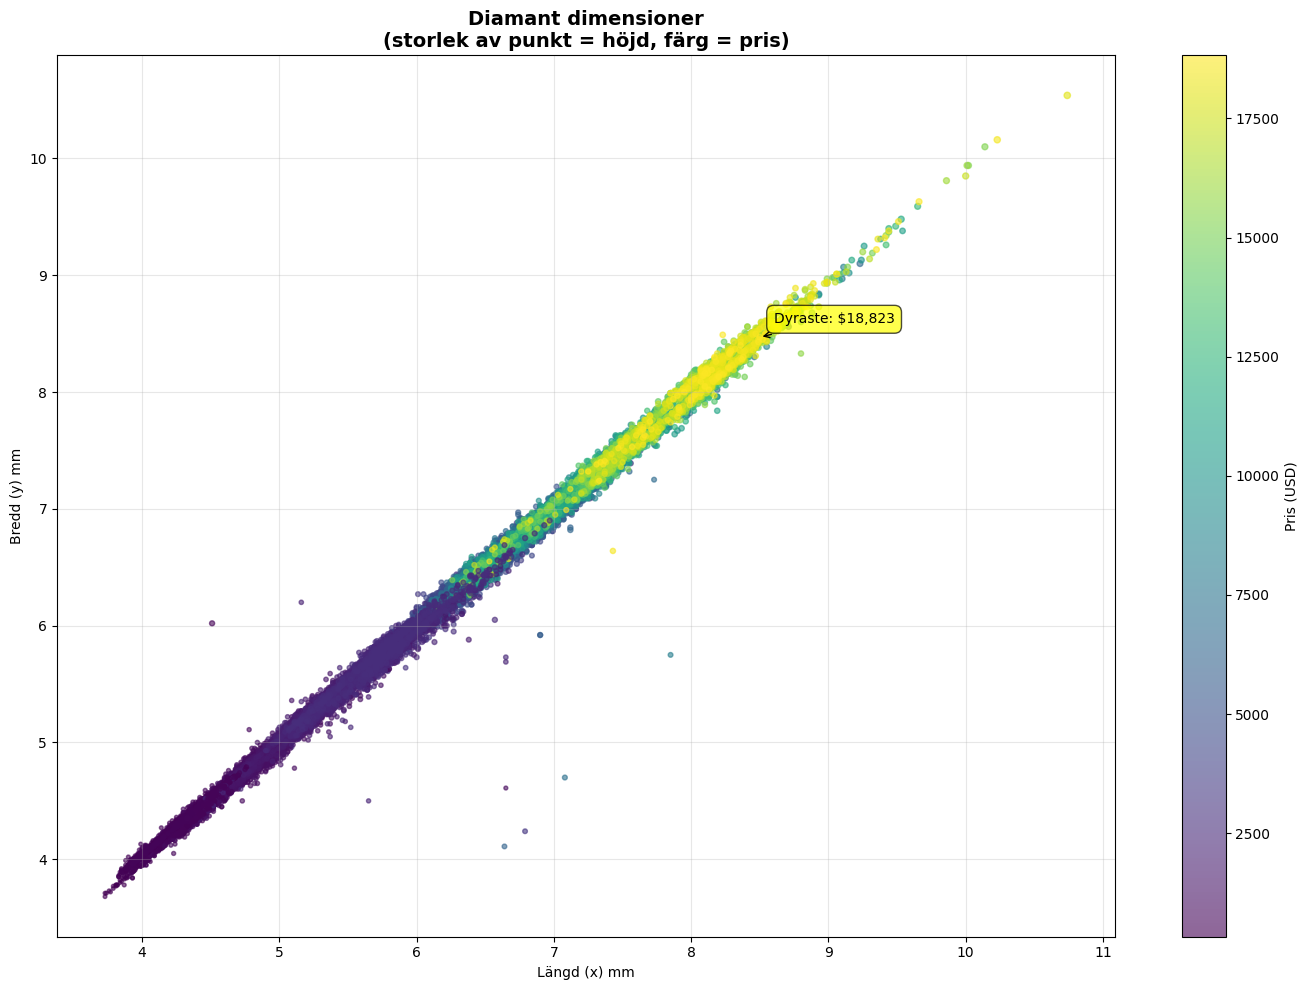

In [ ]:
plt.figure(figsize=(14, 10))

# 3D scatter (x, y, z färgkodat med pris)
scatter = plt.scatter(df['x'], df['y'], c=df['price'], s=df['z']*3, alpha=0.6, cmap='viridis')
plt.xlabel('Längd (x) mm')
plt.ylabel('Bredd (y) mm')
plt.title('Diamant dimensioner\n(storlek av punkt = höjd, färg = pris)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Pris (USD)')
plt.grid(True, alpha=0.3)

# Markera den dyraste diamanten
max_price_idx = df['price'].idxmax()
plt.annotate(f'Dyraste: ${df.loc[max_price_idx, "price"]:,}', 
             xy=(df.loc[max_price_idx, 'x'], df.loc[max_price_idx, 'y']),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

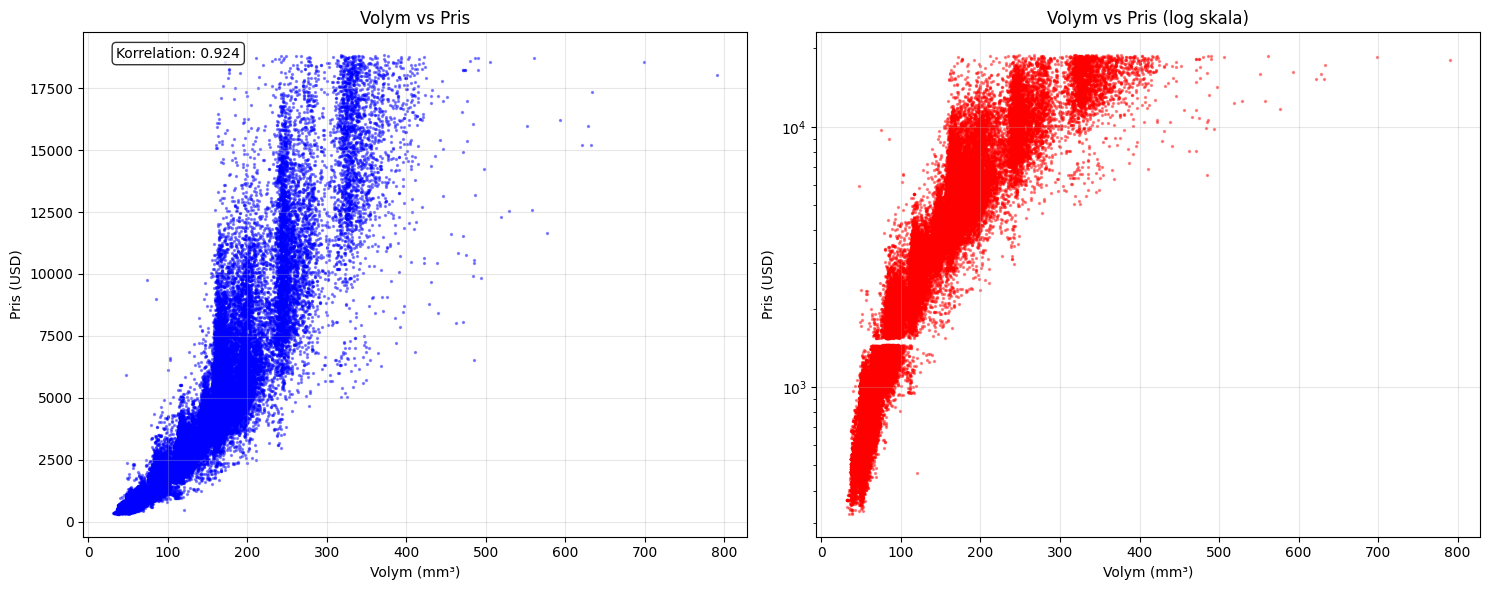

💡 Volym och pris korrelerar starkt: 0.924


In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Volym vs pris (normal skala)
ax1.scatter(df['volume'], df['price'], alpha=0.4, s=2, c='blue')
ax1.set_xlabel('Volym (mm³)')
ax1.set_ylabel('Pris (USD)')
ax1.set_title('Volym vs Pris')
ax1.grid(True, alpha=0.3)

# Beräkna korrelation
volume_price_corr = df['volume'].corr(df['price'])
ax1.text(0.05, 0.95, f'Korrelation: {volume_price_corr:.3f}', 
         transform=ax1.transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Volym vs pris (log skala för bättre spridning)
ax2.scatter(df['volume'], df['price'], alpha=0.4, s=2, c='red')
ax2.set_xlabel('Volym (mm³)')
ax2.set_ylabel('Pris (USD)')
ax2.set_yscale('log')
ax2.set_title('Volym vs Pris (log skala)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"💡 Volym och pris korrelerar starkt: {volume_price_corr:.3f}")

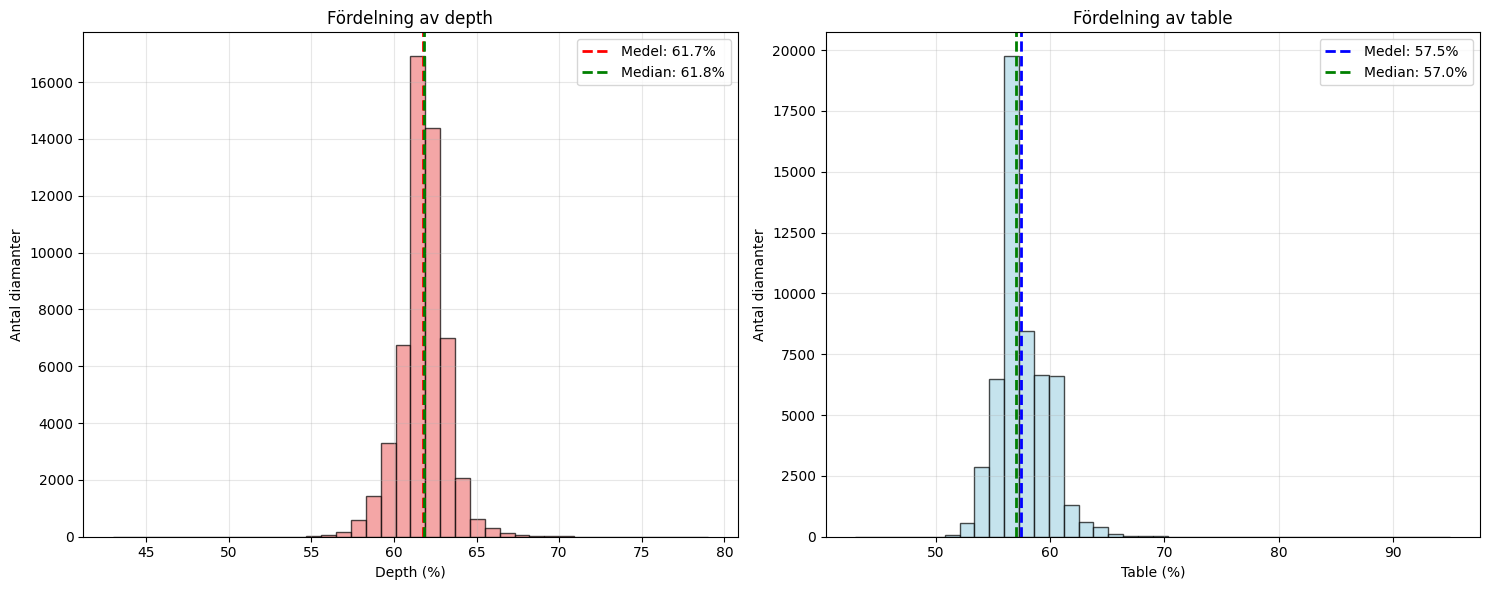

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Depth fördelning
ax1.hist(df['depth'], bins=40, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.set_xlabel('Depth (%)')
ax1.set_ylabel('Antal diamanter')
ax1.set_title('Fördelning av depth')
ax1.axvline(df['depth'].mean(), color='red', linestyle='--', linewidth=2, label=f'Medel: {df["depth"].mean():.1f}%')
ax1.axvline(df['depth'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["depth"].median():.1f}%')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Table fördelning
ax2.hist(df['table'], bins=40, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_xlabel('Table (%)')
ax2.set_ylabel('Antal diamanter')
ax2.set_title('Fördelning av table')
ax2.axvline(df['table'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Medel: {df["table"].mean():.1f}%')
ax2.axvline(df['table'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["table"].median():.1f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
print(f"📊 DEPTH ANALYS:")
print(f"   • Spridning: {df['depth'].min():.1f}% - {df['depth'].max():.1f}%")
print(f"   • Standardavvikelse: {df['depth'].std():.2f}%")
print(f"   • Idealt intervall (±1 std): {df['depth'].mean()-df['depth'].std():.1f}% - {df['depth'].mean()+df['depth'].std():.1f}%")

print(f"\n📊 TABLE ANALYS:")
print(f"   • Spridning: {df['table'].min():.1f}% - {df['table'].max():.1f}%")
print(f"   • Standardavvikelse: {df['table'].std():.2f}%")
print(f"   • Idealt intervall (±1 std): {df['table'].mean()-df['table'].std():.1f}% - {df['table'].mean()+df['table'].std():.1f}%")


📊 DEPTH ANALYS:
   • Spridning: 43.0% - 79.0%
   • Standardavvikelse: 1.43%
   • Idealt intervall (±1 std): 60.3% - 63.2%

📊 TABLE ANALYS:
   • Spridning: 43.0% - 95.0%
   • Standardavvikelse: 2.23%
   • Idealt intervall (±1 std): 55.2% - 59.7%


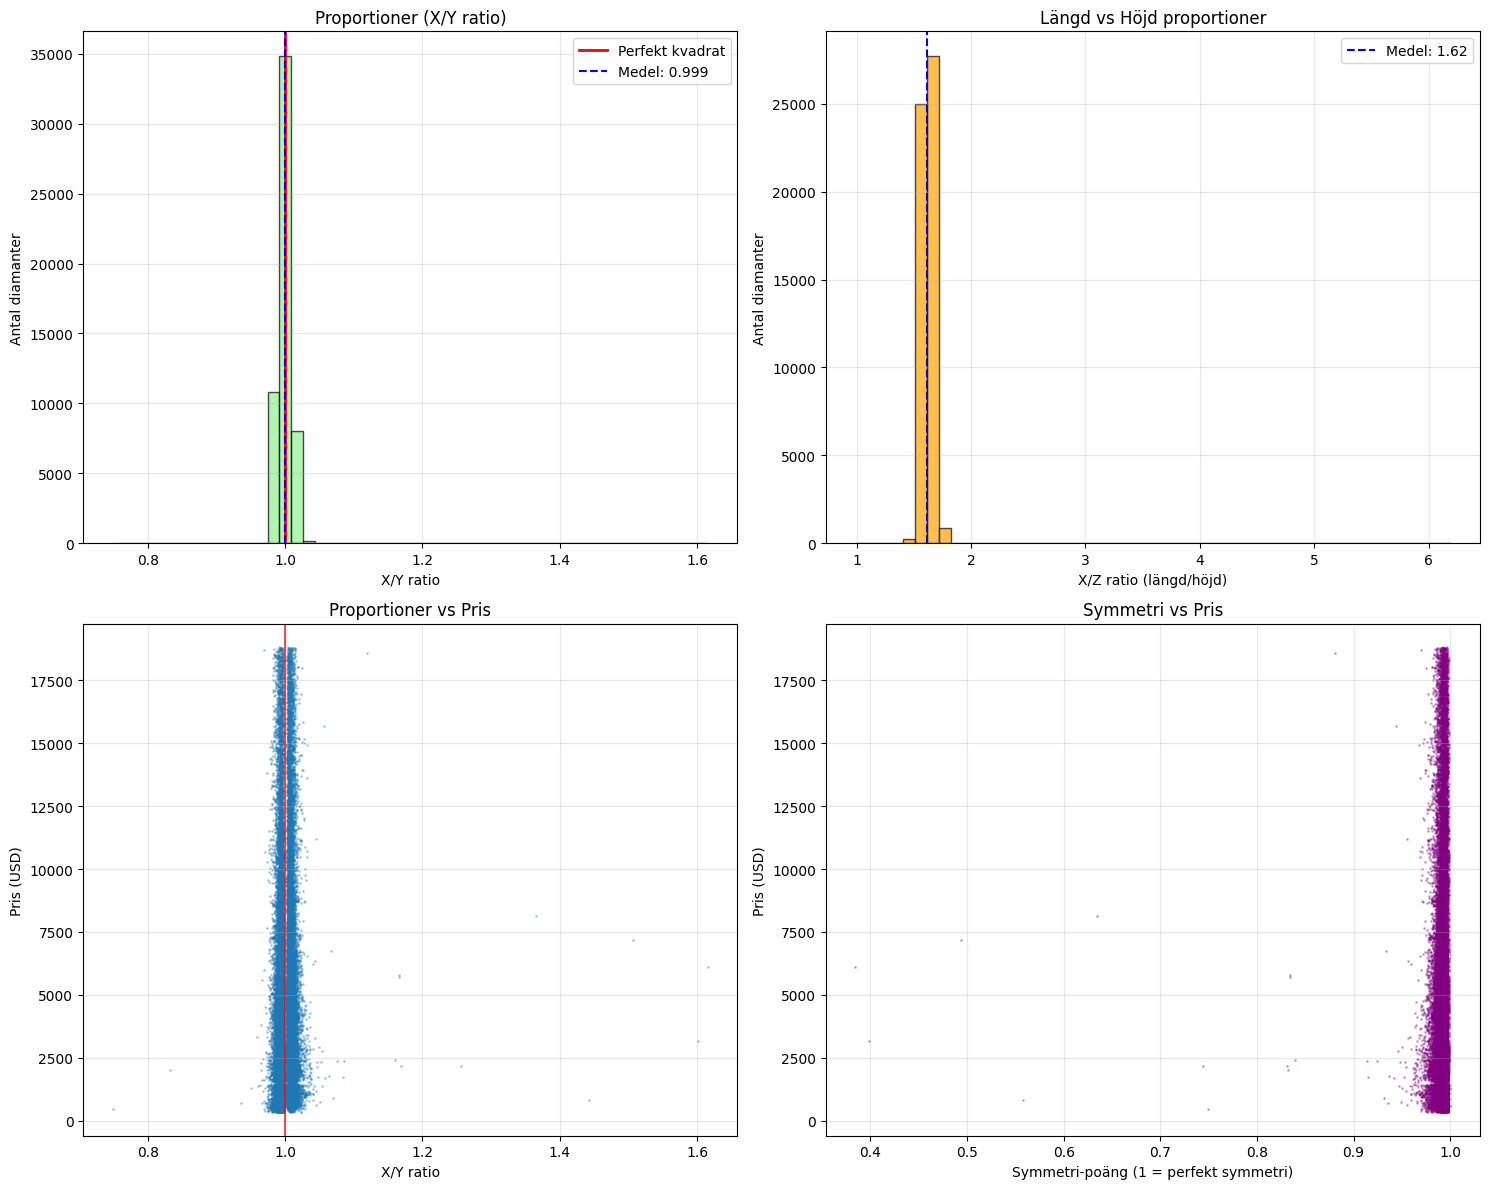

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# X/Y ratio
axes[0,0].hist(df['aspect_ratio_xy'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].set_xlabel('X/Y ratio')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].set_title('Proportioner (X/Y ratio)')
axes[0,0].axvline(1.0, color='red', linestyle='-', linewidth=2, label='Perfekt kvadrat')
axes[0,0].axvline(df['aspect_ratio_xy'].mean(), color='blue', linestyle='--', 
                  label=f'Medel: {df["aspect_ratio_xy"].mean():.3f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# X/Z ratio
axes[0,1].hist(df['aspect_ratio_xz'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_xlabel('X/Z ratio (längd/höjd)')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].set_title('Längd vs Höjd proportioner')
axes[0,1].axvline(df['aspect_ratio_xz'].mean(), color='blue', linestyle='--',
                  label=f'Medel: {df["aspect_ratio_xz"].mean():.2f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Aspect ratio vs pris
axes[1,0].scatter(df['aspect_ratio_xy'], df['price'], alpha=0.3, s=1)
axes[1,0].set_xlabel('X/Y ratio')
axes[1,0].set_ylabel('Pris (USD)')
axes[1,0].set_title('Proportioner vs Pris')
axes[1,0].axvline(1.0, color='red', linestyle='-', alpha=0.7)
axes[1,0].grid(True, alpha=0.3)

# Symmetri analys
df['symmetry_score'] = 1 - abs(df['aspect_ratio_xy'] - 1)
axes[1,1].scatter(df['symmetry_score'], df['price'], alpha=0.3, s=1, c='purple')
axes[1,1].set_xlabel('Symmetri-poäng (1 = perfekt symmetri)')
axes[1,1].set_ylabel('Pris (USD)')
axes[1,1].set_title('Symmetri vs Pris')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

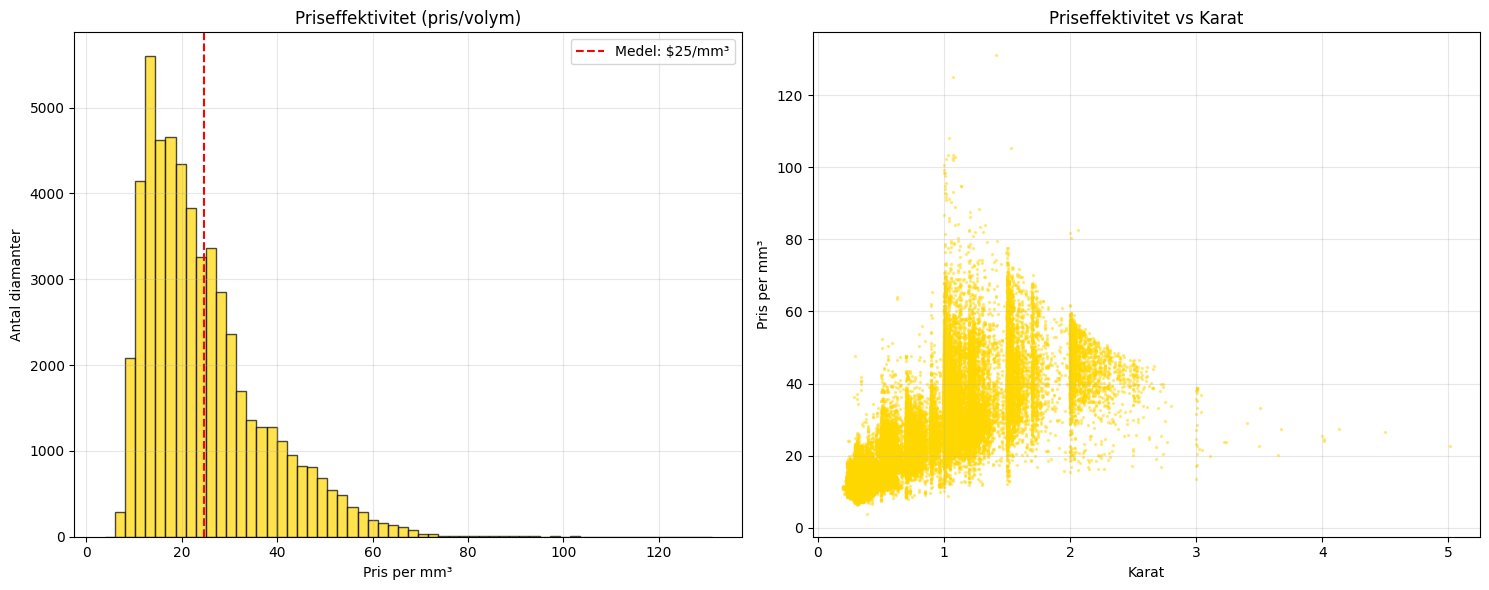

 MEST PRISEFFEKTIVA DIAMANTER (lägst pris per mm³):
       carat        cut color clarity  price  price_per_volume
34282   0.39    Premium     H     SI2    468          3.882307
4       0.31       Good     J     SI2    335          6.452576
31962   0.43    Premium     H      I1    452          6.569724
15      0.32    Premium     E      I1    345          6.649484
13      0.31      Ideal     J     SI2    344          6.677570
28285   0.33      Ideal     J     SI2    366          6.702512
10      0.30       Good     J     SI1    339          6.826598
24      0.31  Very Good     J     SI1    353          6.867275
28271   0.32       Good     D      I1    361          6.878409
23      0.31  Very Good     J     SI1    353          6.927957

 MINST PRISEFFEKTIVA DIAMANTER (högst pris per mm³):
       carat        cut color clarity  price  price_per_volume
21654   1.41      Ideal     H     VS1   9752        131.044864
14635   1.07      Ideal     F     SI1   5909        125.068053
27635   1.04

In [63]:
# Beräkna pris per volym enhet
df['price_per_volume'] = df['price'] / df['volume']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram av pris per volym
ax1.hist(df['price_per_volume'], bins=60, alpha=0.7, color='gold', edgecolor='black')
ax1.set_xlabel('Pris per mm³')
ax1.set_ylabel('Antal diamanter')
ax1.set_title('Priseffektivitet (pris/volym)')
ax1.axvline(df['price_per_volume'].mean(), color='red', linestyle='--', 
            label=f'Medel: ${df["price_per_volume"].mean():.0f}/mm³')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Pris per volym vs karat
ax2.scatter(df['carat'], df['price_per_volume'], alpha=0.4, s=2, c='gold')
ax2.set_xlabel('Karat')
ax2.set_ylabel('Pris per mm³')
ax2.set_title('Priseffektivitet vs Karat')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hitta mest och minst effektiva diamanter
most_efficient = df.nsmallest(10, 'price_per_volume')[['carat', 'cut', 'color', 'clarity', 'price', 'price_per_volume']]
least_efficient = df.nlargest(10, 'price_per_volume')[['carat', 'cut', 'color', 'clarity', 'price', 'price_per_volume']]

print(" MEST PRISEFFEKTIVA DIAMANTER (lägst pris per mm³):")
print(most_efficient)

print("\n MINST PRISEFFEKTIVA DIAMANTER (högst pris per mm³):")
print(least_efficient)

In [62]:
# Korrelationer med geometriska mått
geom_correlations = df[['volume', 'surface_area_approx', 'aspect_ratio_xy', 'depth', 'table', 'price']].corr()['price'].sort_values(ascending=False)

print("Korrelationer med pris (geometriska mått):")
for var, corr in geom_correlations.items():
    if var != 'price':
        print(f"  • {var}: {corr:.3f}")

# Geometriska insights
perfect_symmetry = df[abs(df['aspect_ratio_xy'] - 1) < 0.01]
very_asymmetric = df[abs(df['aspect_ratio_xy'] - 1) > 0.2]

print(f"\n GEOMETRISKA INSIGHTS:")
print(f"  • {len(perfect_symmetry)} diamanter är nästan perfekt symmetriska (x/y ≈ 1)")
print(f"  • {len(very_asymmetric)} diamanter är mycket asymmetriska (x/y avviker >20%)")
print(f"  • Genomsnittlig volym ökar exponentiellt med karat")
print(f"  • Depth och table har svag korrelation med pris")

# Optimal intervall
optimal_depth = df[(df['depth'] >= 58) & (df['depth'] <= 65)]
optimal_table = df[(df['table'] >= 54) & (df['table'] <= 60)]
optimal_both = df[(df['depth'] >= 58) & (df['depth'] <= 65) & 
                  (df['table'] >= 54) & (df['table'] <= 60)]

print(f"\n OPTIMALA PROPORTIONER:")
print(f"  • Depth 58-65%: {len(optimal_depth)} diamanter (medelpris: ${optimal_depth['price'].mean():.0f})")
print(f"  • Table 54-60%: {len(optimal_table)} diamanter (medelpris: ${optimal_table['price'].mean():.0f})")
print(f"  • Båda optimala: {len(optimal_both)} diamanter (medelpris: ${optimal_both['price'].mean():.0f})")

print(f"\n Del 4 SLUTSATS:")
print("Geometrin spelar en avgörande roll för diamantens värde!")
print("Volym korrelerar starkt med pris, men proportioner och symmetri påverkar också värdet.")

Korrelationer med pris (geometriska mått):
  • volume: 0.924
  • surface_area_approx: 0.911
  • table: 0.127
  • aspect_ratio_xy: 0.091
  • depth: -0.011

 GEOMETRISKA INSIGHTS:
  • 41977 diamanter är nästan perfekt symmetriska (x/y ≈ 1)
  • 7 diamanter är mycket asymmetriska (x/y avviker >20%)
  • Genomsnittlig volym ökar exponentiellt med karat
  • Depth och table har svag korrelation med pris

 OPTIMALA PROPORTIONER:
  • Depth 58-65%: 52502 diamanter (medelpris: $3922)
  • Table 54-60%: 48298 diamanter (medelpris: $3901)
  • Båda optimala: 47400 diamanter (medelpris: $3892)

 Del 4 SLUTSATS:
Geometrin spelar en avgörande roll för diamantens värde!
Volym korrelerar starkt med pris, men proportioner och symmetri påverkar också värdet.


In [64]:
# Skapa prissegment
def create_price_segments(price):
    if price < 1000:
        return 'Budget (< $1,000)'
    elif price < 2500:
        return 'Mellanklass ($1,000-$2,500)'
    elif price < 5000:
        return 'Premium ($2,500-$5,000)'
    elif price < 10000:
        return 'Lyx ($5,000-$10,000)'
    else:
        return 'Ultra-lyx (> $10,000)'

df['price_segment'] = df['price'].apply(create_price_segments)

# Skapa karatsegment
def create_carat_segments(carat):
    if carat < 0.5:
        return 'Liten (< 0.5ct)'
    elif carat < 1.0:
        return 'Medium (0.5-1.0ct)'
    elif carat < 1.5:
        return 'Stor (1.0-1.5ct)'
    elif carat < 2.0:
        return 'Mycket stor (1.5-2.0ct)'
    else:
        return 'Enormt (> 2.0ct)'

df['carat_segment'] = df['carat'].apply(create_carat_segments)

# Skapa kvalitetssegment baserat på cut
def create_quality_segments(cut):
    if cut in ['Fair', 'Good']:
        return 'Standard kvalitet'
    elif cut == 'Very Good':
        return 'Hög kvalitet'
    elif cut == 'Premium':
        return 'Premium kvalitet'
    else:  # Ideal
        return 'Ideal kvalitet'

df['quality_segment'] = df['cut'].apply(create_quality_segments)

print("📊 Segment skapade:")
print(f"• Prissegment: {df['price_segment'].nunique()} kategorier")
print(f"• Karatsegment: {df['carat_segment'].nunique()} kategorier") 
print(f"• Kvalitetssegment: {df['quality_segment'].nunique()} kategorier")


📊 Segment skapade:
• Prissegment: 5 kategorier
• Karatsegment: 5 kategorier
• Kvalitetssegment: 4 kategorier


In [65]:
price_segment_analysis = df.groupby('price_segment').agg({
    'price': ['mean', 'median', 'count', 'std'],
    'carat': 'mean',
    'cut': lambda x: x.value_counts().index[0],  # Mest vanliga cut
    'color': lambda x: x.value_counts().index[0],  # Mest vanliga färg
    'clarity': lambda x: x.value_counts().index[0]  # Mest vanliga klarhet
}).round(2)

price_segment_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Prisstd', 'Medelkarat', 'Vanligaste_Cut', 'Vanligaste_Color', 'Vanligaste_Clarity']

print(price_segment_analysis)

# Beräkna procentuell fördelning
price_segment_pct = df['price_segment'].value_counts(normalize=True) * 100
print(f"\n📈 Procentuell fördelning av prissegment:")
for segment, pct in price_segment_pct.items():
    count = df['price_segment'].value_counts()[segment]
    print(f"  • {segment}: {pct:.1f}% ({count:,} diamanter)")

                             Medelpris  Medianpris  Antal  Prisstd  \
price_segment                                                        
Budget (< $1,000)               707.88       708.0  14499   161.53   
Lyx ($5,000-$10,000)           6930.38      6653.0   9501  1410.10   
Mellanklass ($1,000-$2,500)    1646.44      1649.0  13036   451.01   
Premium ($2,500-$5,000)        3708.86      3723.0  11667   739.78   
Ultra-lyx (> $10,000)         13636.26     13232.5   5214  2516.75   

                             Medelkarat Vanligaste_Cut Vanligaste_Color  \
price_segment                                                             
Budget (< $1,000)                  0.33          Ideal                G   
Lyx ($5,000-$10,000)               1.21          Ideal                G   
Mellanklass ($1,000-$2,500)        0.55          Ideal                E   
Premium ($2,500-$5,000)            0.90          Ideal                F   
Ultra-lyx (> $10,000)              1.74        Premium     

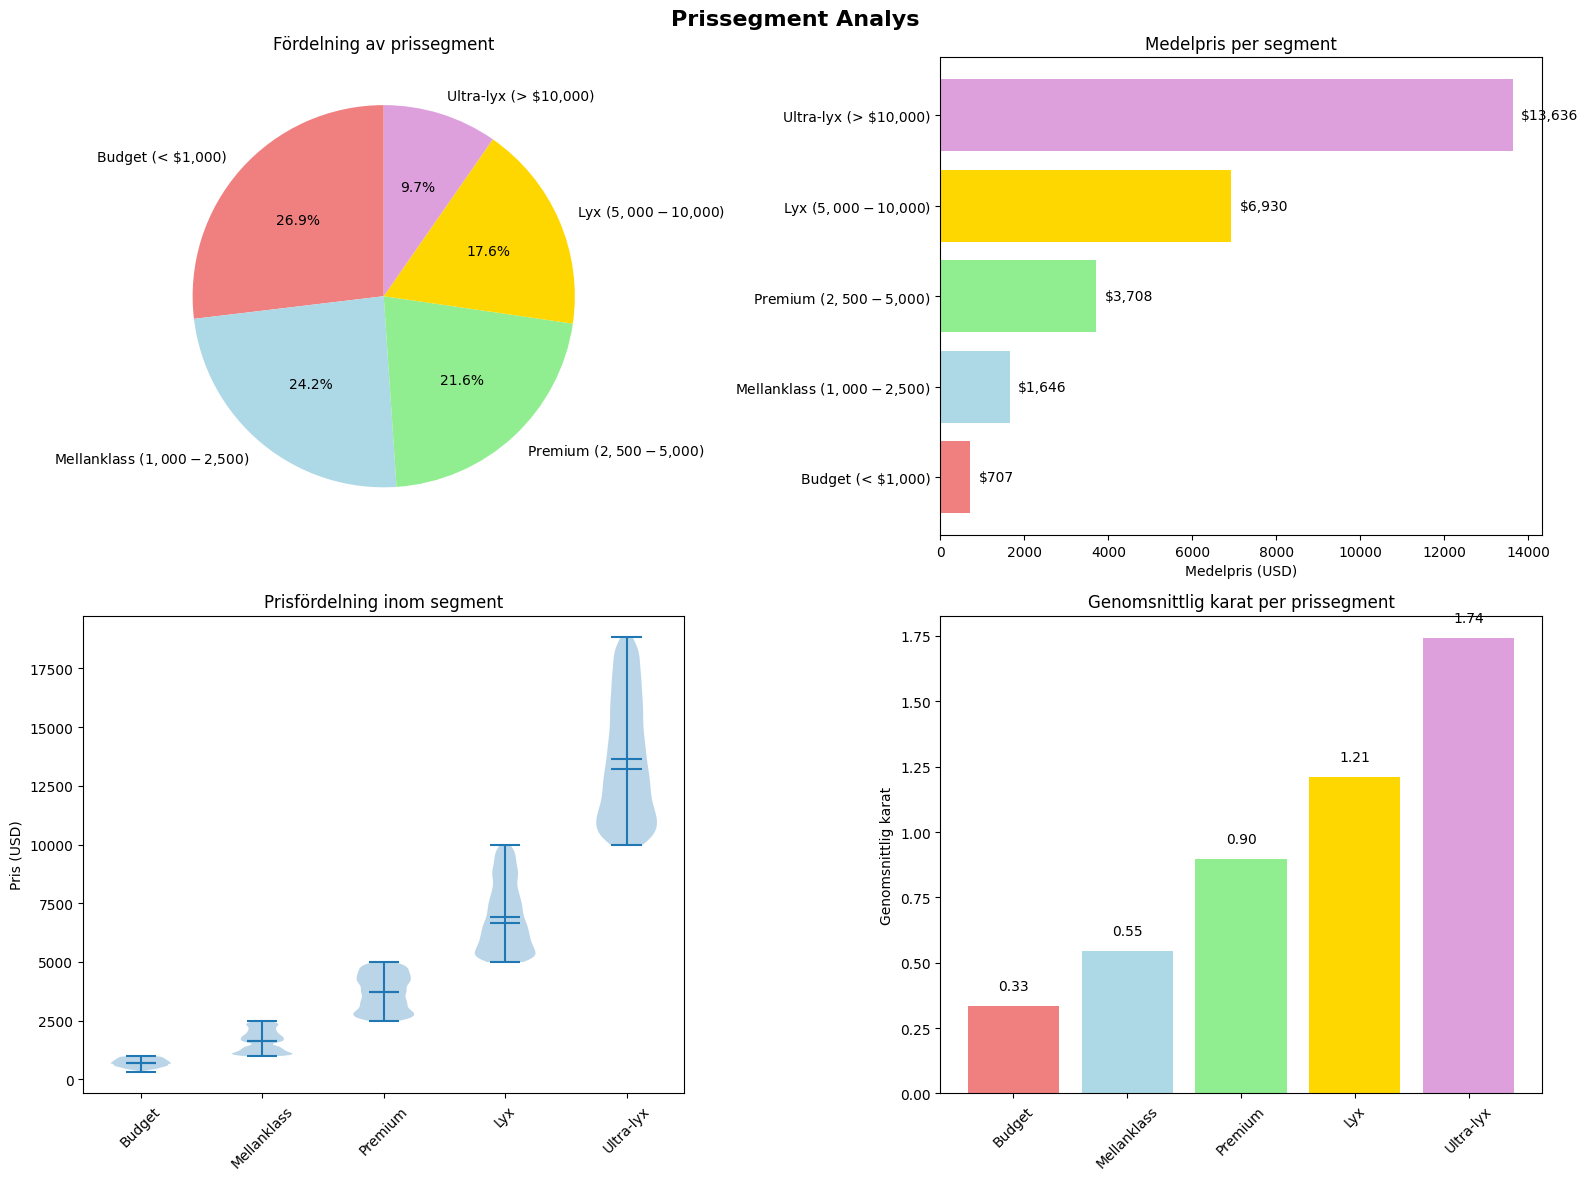

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Prissegment Analys', fontsize=16, fontweight='bold')

# Pie chart för prissegment fördelning
price_seg_counts = df['price_segment'].value_counts()
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum']
wedges, texts, autotexts = axes[0,0].pie(price_seg_counts.values, labels=price_seg_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
axes[0,0].set_title('Fördelning av prissegment')

# Medelpris per segment
price_means = df.groupby('price_segment')['price'].mean().sort_values(ascending=True)
bars = axes[0,1].barh(price_means.index, price_means.values, color=colors)
axes[0,1].set_xlabel('Medelpris (USD)')
axes[0,1].set_title('Medelpris per segment')
# Lägg till värden på staplarna
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,1].text(width + 200, bar.get_y() + bar.get_height()/2,
                   f'${int(width):,}', ha='left', va='center')

# Violin plot för prisfördelning inom segment
price_data = [df[df['price_segment'] == segment]['price'] for segment in price_seg_counts.index]
parts = axes[1,0].violinplot(price_data, range(len(price_seg_counts)), showmeans=True, showmedians=True)
axes[1,0].set_xticks(range(len(price_seg_counts)))
axes[1,0].set_xticklabels([seg.split(' (')[0] for seg in price_seg_counts.index], rotation=45)
axes[1,0].set_ylabel('Pris (USD)')
axes[1,0].set_title('Prisfördelning inom segment')

# Genomsnittlig karat per prissegment
carat_means = df.groupby('price_segment')['carat'].mean().reindex(price_seg_counts.index)
axes[1,1].bar(range(len(carat_means)), carat_means.values, color=colors)
axes[1,1].set_xticks(range(len(carat_means)))
axes[1,1].set_xticklabels([seg.split(' (')[0] for seg in carat_means.index], rotation=45)
axes[1,1].set_ylabel('Genomsnittlig karat')
axes[1,1].set_title('Genomsnittlig karat per prissegment')

# Lägg till värden på staplarna
for i, v in enumerate(carat_means.values):
    axes[1,1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [70]:
print("\n📊 Karatsegment Analys:")

carat_segment_analysis = df.groupby('carat_segment').agg({
    'price': ['mean', 'median', 'count'],
    'carat': ['mean', 'min', 'max'],
    'color': lambda x: x.value_counts().index[0],  # Mest vanliga färg
    'cut': lambda x: x.value_counts().index[0]     # Mest vanliga cut
}).round(2)

carat_segment_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat', 'Min_karat', 'Max_karat', 'Vanligaste_Color', 'Vanligaste_Cut']

# Sortera enligt naturlig ordning
carat_order = ['Liten (< 0.5ct)', 'Medium (0.5-1.0ct)', 'Stor (1.0-1.5ct)', 'Mycket stor (1.5-2.0ct)', 'Enormt (> 2.0ct)']
carat_segment_analysis = carat_segment_analysis.reindex(carat_order)

print(carat_segment_analysis)

# Beräkna pris per karat för varje segment
df['price_per_carat'] = df['price'] / df['carat']
price_per_carat_by_segment = df.groupby('carat_segment')['price_per_carat'].mean().reindex(carat_order)

print(f"\n Pris per karat för varje segment:")
for segment, price_per_carat in price_per_carat_by_segment.items():
    if pd.notna(price_per_carat):
        print(f"  • {segment}: ${price_per_carat:.0f}/karat")


📊 Karatsegment Analys:
                         Medelpris  Medianpris  Antal  Medelkarat  Min_karat  \
carat_segment                                                                  
Liten (< 0.5ct)             792.40       765.0  17674        0.34        0.2   
Medium (0.5-1.0ct)         2495.83      2323.0  17202        0.68        0.5   
Stor (1.0-1.5ct)           6140.47      5599.0  12815        1.11        1.0   
Mycket stor (1.5-2.0ct)   10898.22     10609.0   4079        1.58        1.5   
Enormt (> 2.0ct)          14839.65     15261.0   2147        2.13        2.0   

                         Max_karat Vanligaste_Color Vanligaste_Cut  
carat_segment                                                       
Liten (< 0.5ct)               0.49                E          Ideal  
Medium (0.5-1.0ct)            0.99                E          Ideal  
Stor (1.0-1.5ct)              1.49                G          Ideal  
Mycket stor (1.5-2.0ct)       1.99                H        Premium  
E

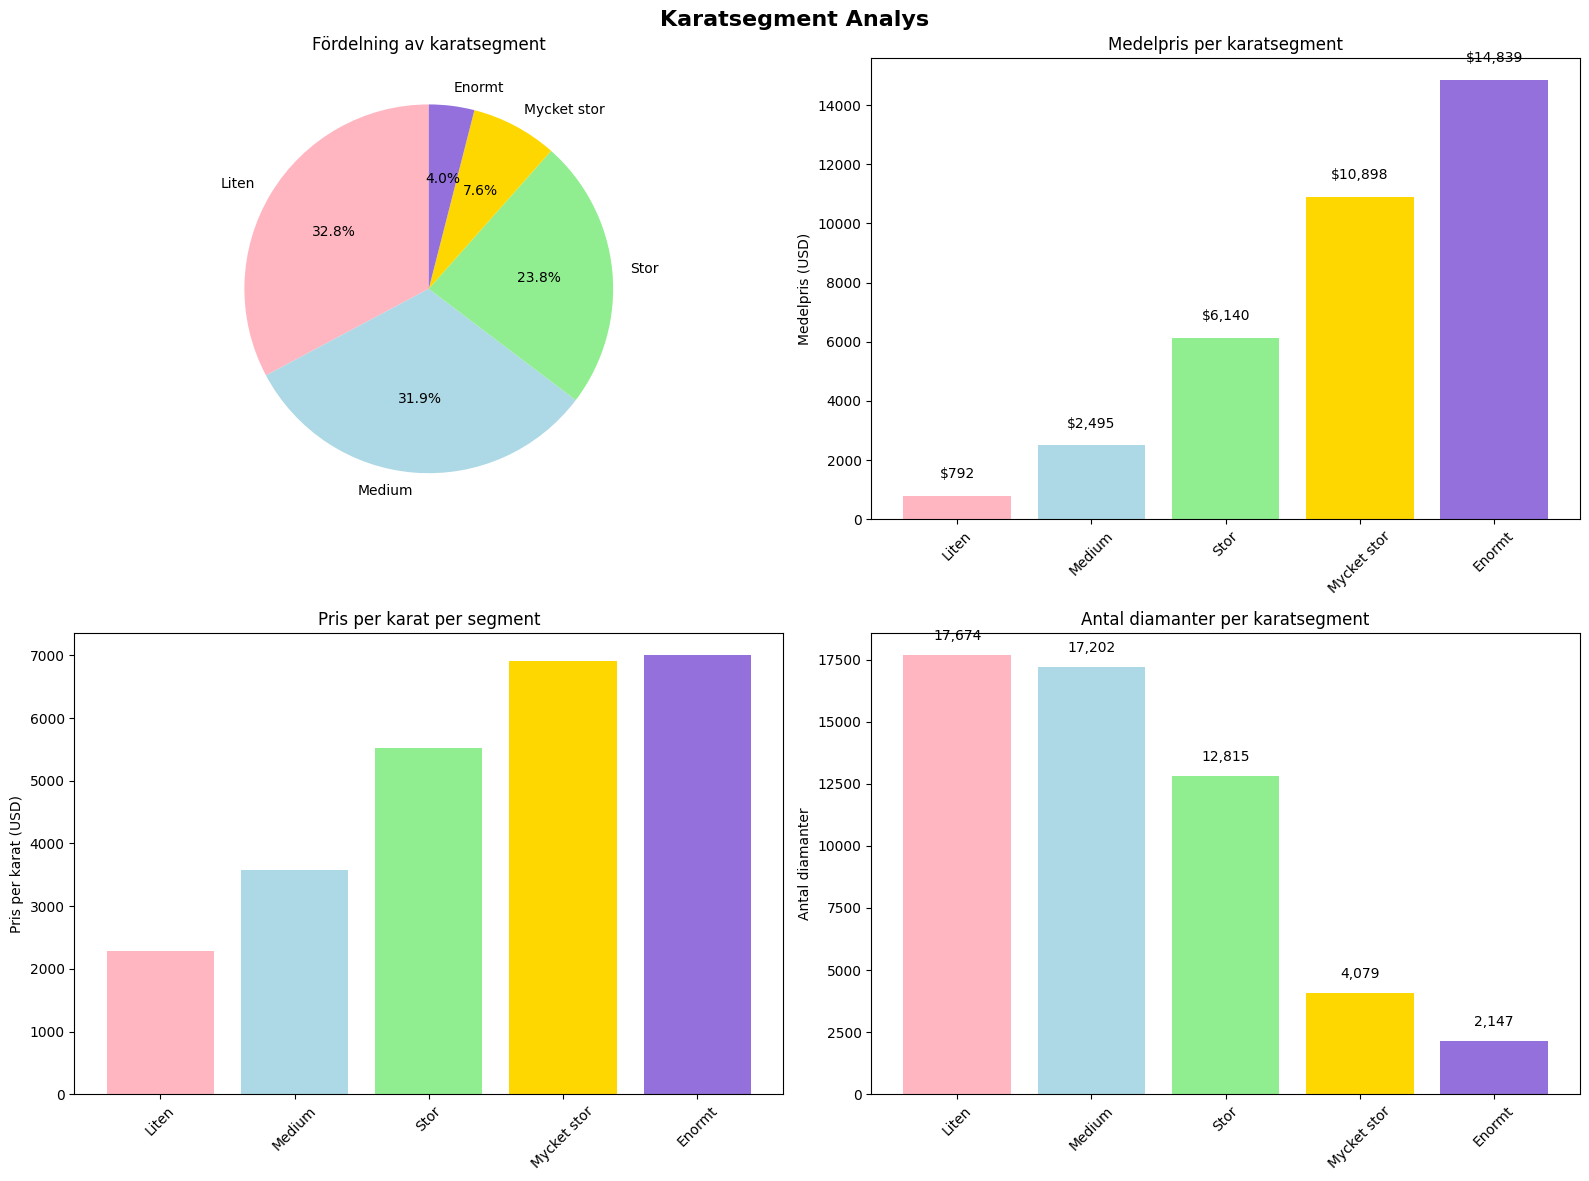

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Karatsegment Analys', fontsize=16, fontweight='bold')

# Pie chart för karatsegment fördelning
carat_seg_counts = df['carat_segment'].value_counts().reindex(carat_order)
carat_colors = ['lightpink', 'lightblue', 'lightgreen', 'gold', 'mediumpurple']
axes[0,0].pie(carat_seg_counts.values, labels=[seg.split(' (')[0] for seg in carat_seg_counts.index], 
              autopct='%1.1f%%', startangle=90, colors=carat_colors)
axes[0,0].set_title('Fördelning av karatsegment')

# Medelpris per karatsegment
carat_price_means = df.groupby('carat_segment')['price'].mean().reindex(carat_order)
axes[0,1].bar(range(len(carat_price_means)), carat_price_means.values, color=carat_colors)
axes[0,1].set_xticks(range(len(carat_price_means)))
axes[0,1].set_xticklabels([seg.split(' (')[0] for seg in carat_price_means.index], rotation=45)
axes[0,1].set_ylabel('Medelpris (USD)')
axes[0,1].set_title('Medelpris per karatsegment')

# Lägg till värden på staplarna
for i, v in enumerate(carat_price_means.values):
    if pd.notna(v):
        axes[0,1].text(i, v + 500, f'${int(v):,}', ha='center', va='bottom')

# Pris per karat
axes[1,0].bar(range(len(price_per_carat_by_segment)), price_per_carat_by_segment.values, color=carat_colors)
axes[1,0].set_xticks(range(len(price_per_carat_by_segment)))
axes[1,0].set_xticklabels([seg.split(' (')[0] for seg in price_per_carat_by_segment.index], rotation=45)
axes[1,0].set_ylabel('Pris per karat (USD)')
axes[1,0].set_title('Pris per karat per segment')

# Antal diamanter per segment
axes[1,1].bar(range(len(carat_seg_counts)), carat_seg_counts.values, color=carat_colors)
axes[1,1].set_xticks(range(len(carat_seg_counts)))
axes[1,1].set_xticklabels([seg.split(' (')[0] for seg in carat_seg_counts.index], rotation=45)
axes[1,1].set_ylabel('Antal diamanter')
axes[1,1].set_title('Antal diamanter per karatsegment')

# Lägg till värden på staplarna
for i, v in enumerate(carat_seg_counts.values):
    axes[1,1].text(i, v + 500, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


🔄 CROSS-SEGMENT ANALYS:
-------------------------
Antal diamanter per kombination:
carat_segment                Enormt (> 2.0ct)  Liten (< 0.5ct)  \
price_segment                                                    
Budget (< $1,000)                           0            14349   
Lyx ($5,000-$10,000)                      115                0   
Mellanklass ($1,000-$2,500)                 0             3323   
Premium ($2,500-$5,000)                     0                2   
Ultra-lyx (> $10,000)                    2032                0   

carat_segment                Medium (0.5-1.0ct)  Mycket stor (1.5-2.0ct)  \
price_segment                                                              
Budget (< $1,000)                           150                        0   
Lyx ($5,000-$10,000)                        249                     1684   
Mellanklass ($1,000-$2,500)                9660                        0   
Premium ($2,500-$5,000)                    7143                       46 

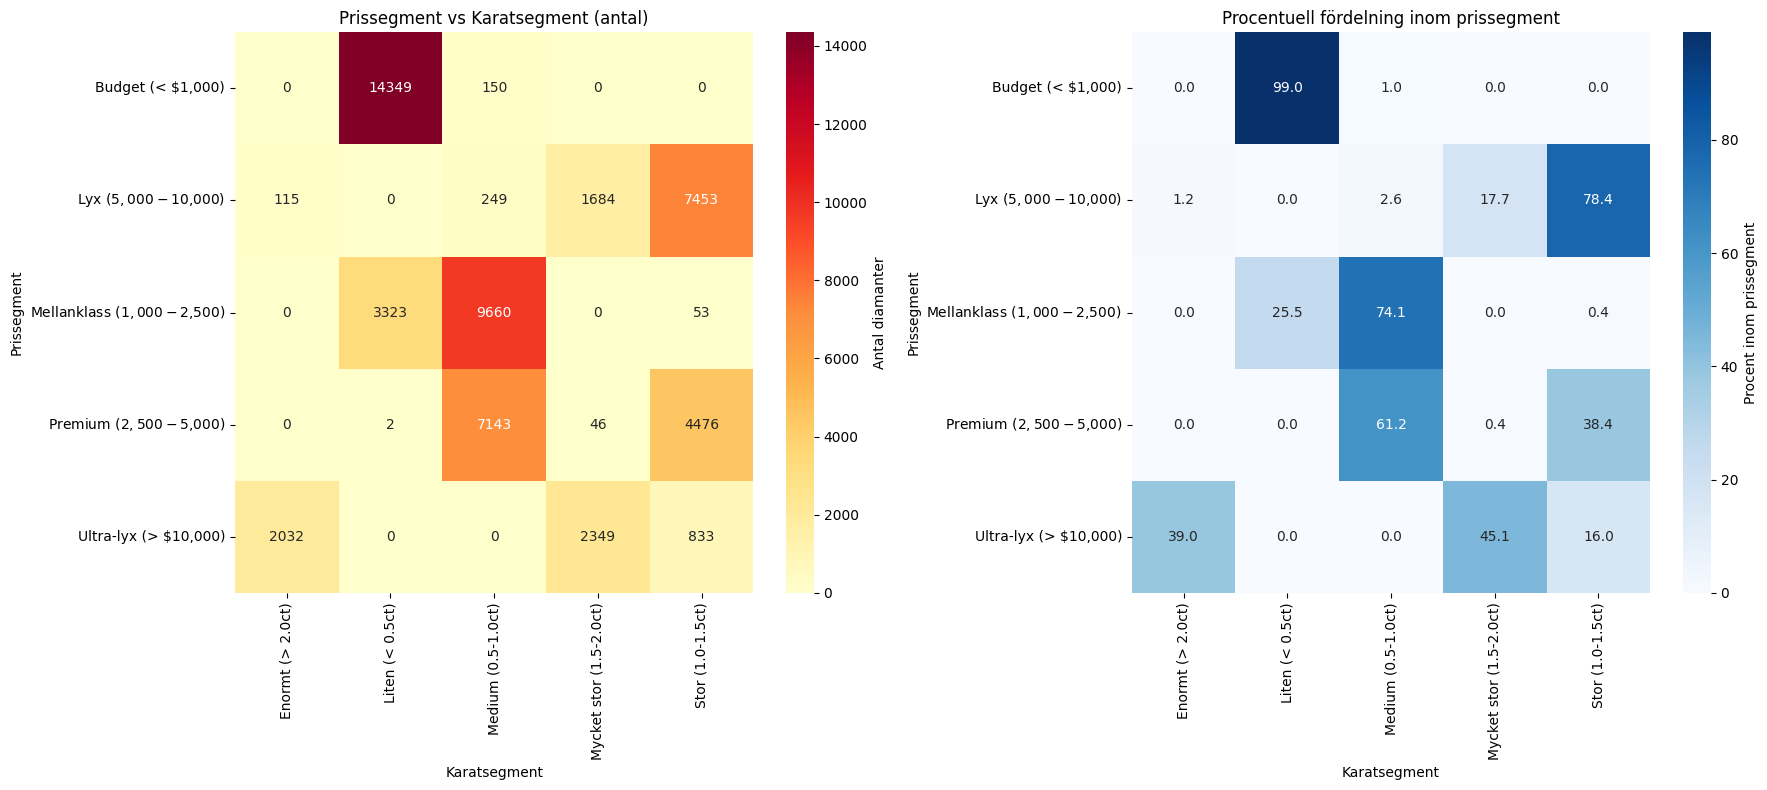

In [72]:
print("\n🔄 CROSS-SEGMENT ANALYS:")
print("-" * 25)

# Skapa crosstab
segment_crosstab = pd.crosstab(df['price_segment'], df['carat_segment'])
segment_crosstab_pct = pd.crosstab(df['price_segment'], df['carat_segment'], normalize='index') * 100

print("Antal diamanter per kombination:")
print(segment_crosstab)

print(f"\nProcentuell fördelning inom varje prissegment:")
print(segment_crosstab_pct.round(1))

# Visualisera crosstab
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap: antal diamanter
sns.heatmap(segment_crosstab, annot=True, fmt='d', ax=ax1, cmap='YlOrRd', cbar_kws={'label': 'Antal diamanter'})
ax1.set_title('Prissegment vs Karatsegment (antal)')
ax1.set_xlabel('Karatsegment')
ax1.set_ylabel('Prissegment')

# Heatmap: procentuell fördelning
sns.heatmap(segment_crosstab_pct, annot=True, fmt='.1f', ax=ax2, cmap='Blues', cbar_kws={'label': 'Procent inom prissegment'})
ax2.set_title('Procentuell fördelning inom prissegment')
ax2.set_xlabel('Karatsegment')
ax2.set_ylabel('Prissegment')

plt.tight_layout()
plt.show()



✨ KVALITET PER PRISSEGMENT:
------------------------------
Kvalitetsfördelning per prissegment (antal):
quality_segment              Hög kvalitet  Ideal kvalitet  Premium kvalitet  \
price_segment                                                                 
Budget (< $1,000)                    3240            6838              3200   
Lyx ($5,000-$10,000)                 2222            3218              2914   
Mellanklass ($1,000-$2,500)          2574            6016              2896   
Premium ($2,500-$5,000)              2920            3706              2969   
Ultra-lyx (> $10,000)                1124            1769              1800   

quality_segment              Standard kvalitet  
price_segment                                   
Budget (< $1,000)                         1221  
Lyx ($5,000-$10,000)                      1147  
Mellanklass ($1,000-$2,500)               1550  
Premium ($2,500-$5,000)                   2072  
Ultra-lyx (> $10,000)                      521 

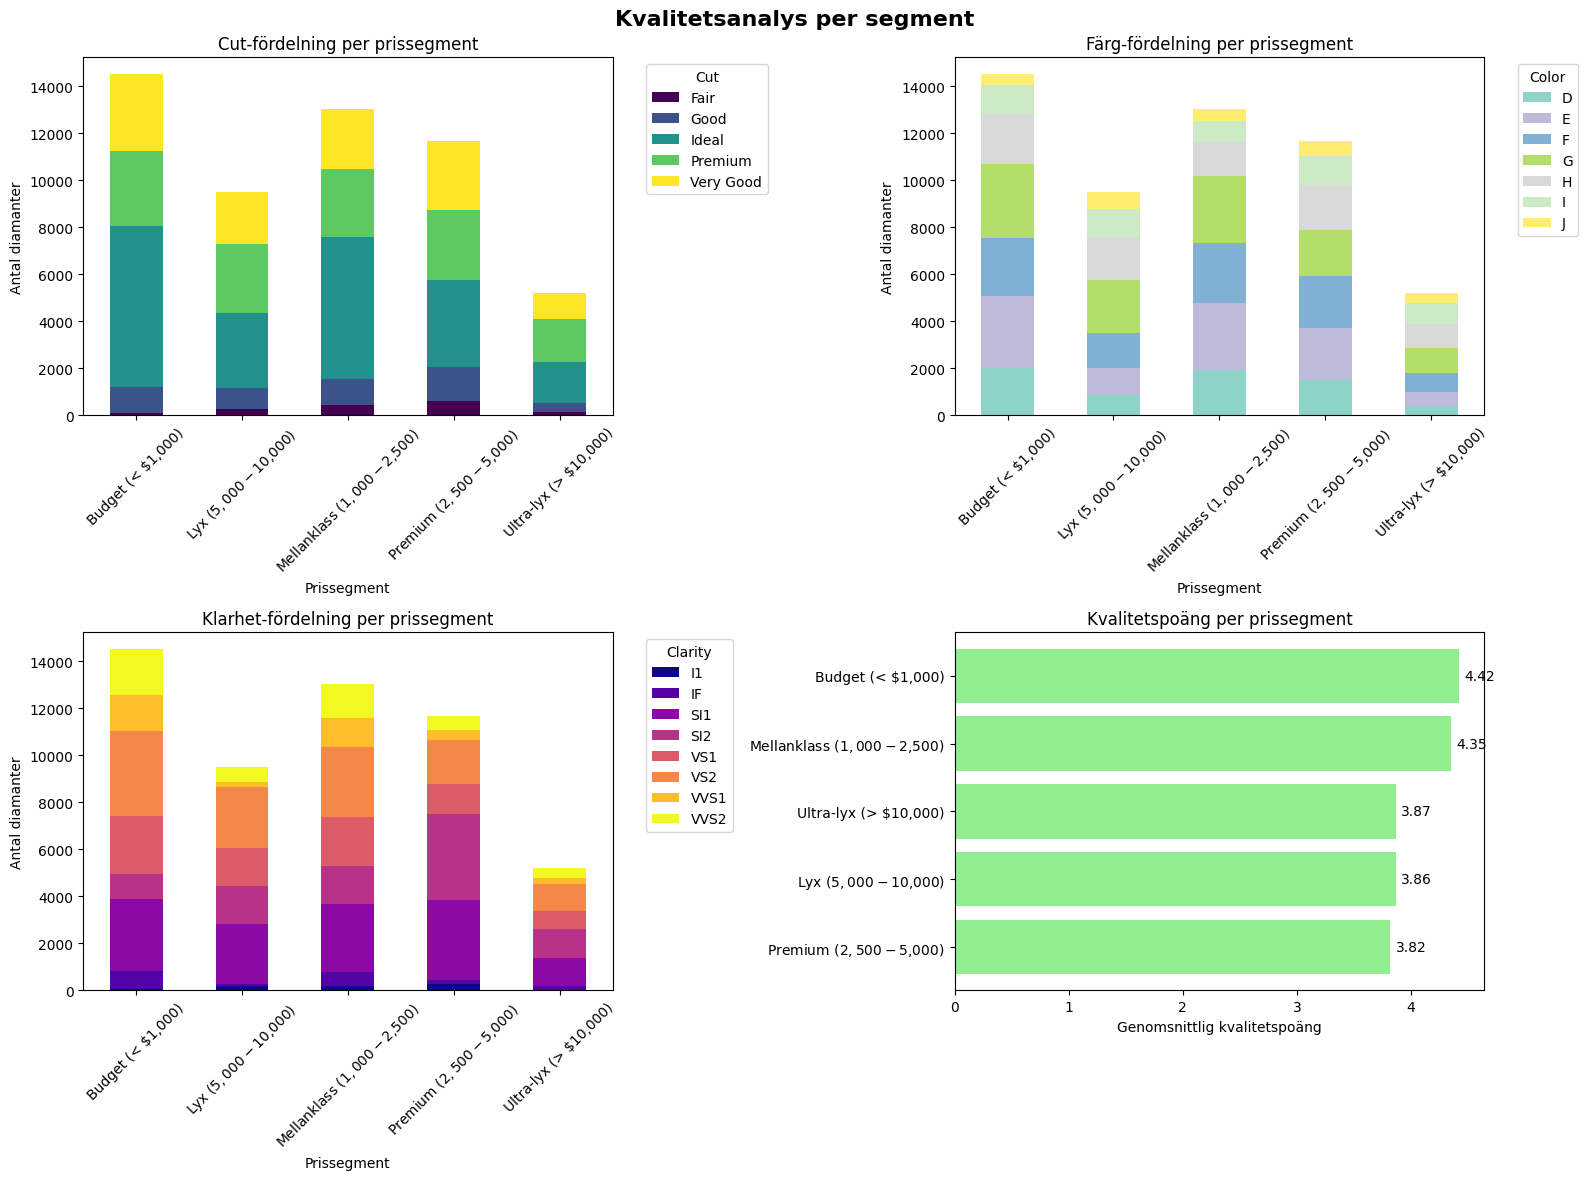

In [73]:
print("\n✨ KVALITET PER PRISSEGMENT:")
print("-" * 30)

# Kvalitetsfördelning per prissegment
quality_price_crosstab = pd.crosstab(df['price_segment'], df['quality_segment'])
quality_price_pct = pd.crosstab(df['price_segment'], df['quality_segment'], normalize='index') * 100

print("Kvalitetsfördelning per prissegment (antal):")
print(quality_price_crosstab)

print(f"\nKvalitetsfördelning per prissegment (procent):")
print(quality_price_pct.round(1))

# Visualisera kvalitetsfördelning
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Kvalitetsanalys per segment', fontsize=16, fontweight='bold')

# Cut distribution per prissegment (stacked bar)
cut_price_crosstab = pd.crosstab(df['price_segment'], df['cut'])
cut_price_crosstab.plot(kind='bar', ax=axes[0,0], stacked=True, colormap='viridis')
axes[0,0].set_title('Cut-fördelning per prissegment')
axes[0,0].set_xlabel('Prissegment')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')

# Color distribution per prissegment
color_price_crosstab = pd.crosstab(df['price_segment'], df['color'])
color_price_crosstab.plot(kind='bar', ax=axes[0,1], stacked=True, colormap='Set3')
axes[0,1].set_title('Färg-fördelning per prissegment')
axes[0,1].set_xlabel('Prissegment')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')

# Clarity distribution per prissegment
clarity_price_crosstab = pd.crosstab(df['price_segment'], df['clarity'])
clarity_price_crosstab.plot(kind='bar', ax=axes[1,0], stacked=True, colormap='plasma')
axes[1,0].set_title('Klarhet-fördelning per prissegment')
axes[1,0].set_xlabel('Prissegment')
axes[1,0].set_ylabel('Antal diamanter')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Genomsnittliga kvalitetspoäng per segment (beräkna kvalitetspoäng)
cut_scores = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_scores = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_scores = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

df['cut_score'] = df['cut'].map(cut_scores)
df['color_score'] = df['color'].map(color_scores)
df['clarity_score'] = df['clarity'].map(clarity_scores)
df['total_quality_score'] = (df['cut_score'] + df['color_score'] + df['clarity_score']) / 3

quality_by_segment = df.groupby('price_segment')['total_quality_score'].mean().sort_values(ascending=True)
axes[1,1].barh(quality_by_segment.index, quality_by_segment.values, color='lightgreen')
axes[1,1].set_xlabel('Genomsnittlig kvalitetspoäng')
axes[1,1].set_title('Kvalitetspoäng per prissegment')

# Lägg till värden
for i, v in enumerate(quality_by_segment.values):
    axes[1,1].text(v + 0.05, i, f'{v:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


🎯 MARKNADSSEGMENT SAMMANFATTNING:
----------------------------------------

📊 Budget (< $1,000):
   • Antal: 14,499 (26.9% av marknaden)
   • Medelpris: $708
   • Medelkarat: 0.33
   • Typisk profil: Ideal, G, VS2
   • Kvalitetspoäng: 4.42/5
   • Pris/karat: $2,126

📊 Premium ($2,500-$5,000):
   • Antal: 11,667 (21.6% av marknaden)
   • Medelpris: $3,709
   • Medelkarat: 0.90
   • Typisk profil: Ideal, F, SI2
   • Kvalitetspoäng: 3.82/5
   • Pris/karat: $4,160

📊 Lyx ($5,000-$10,000):
   • Antal: 9,501 (17.6% av marknaden)
   • Medelpris: $6,930
   • Medelkarat: 1.21
   • Typisk profil: Ideal, G, VS2
   • Kvalitetspoäng: 3.86/5
   • Pris/karat: $5,822

📊 Ultra-lyx (> $10,000):
   • Antal: 5,214 (9.7% av marknaden)
   • Medelpris: $13,636
   • Medelkarat: 1.74
   • Typisk profil: Premium, G, SI2
   • Kvalitetspoäng: 3.87/5
   • Pris/karat: $8,044

📊 Mellanklass ($1,000-$2,500):
   • Antal: 13,036 (24.2% av marknaden)
   • Medelpris: $1,646
   • Medelkarat: 0.55
   • Typisk profil: Idea

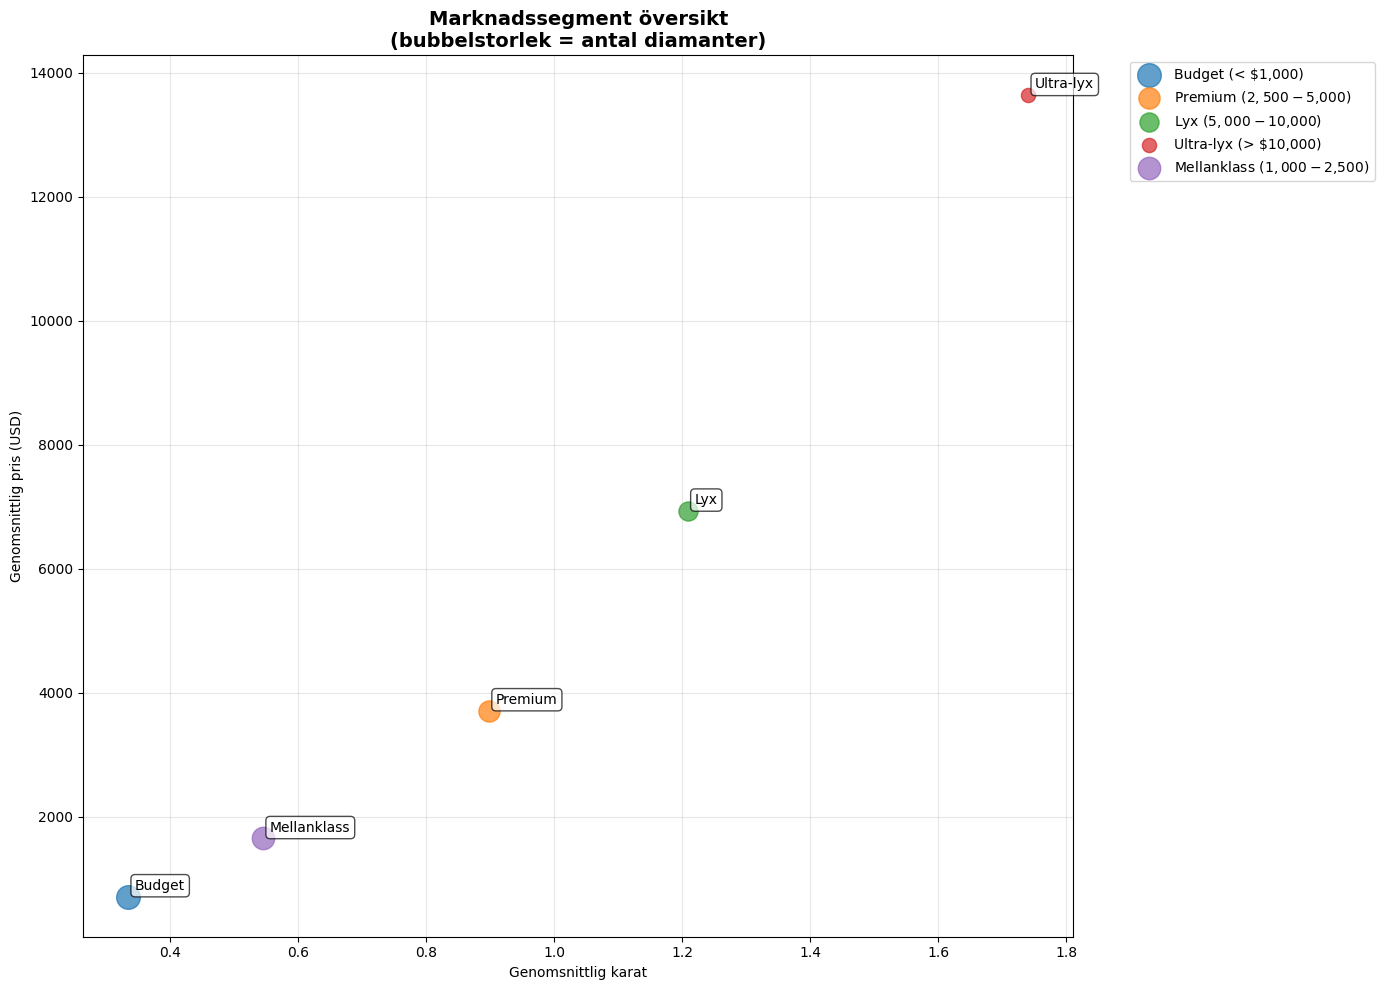


💡 MARKNADSMÖNSTER:
• Budget-segmentet dominerar volymen men låg lönsamhet
• Premium-segmentet balanserar volym och pris bra
• Ultra-lyx är nischmarknad med få men värdefulla kunder
• Kvalitetspoäng korrelerar positivt med prissegment
• Större diamanter hamnar naturligt i dyrare segment


In [74]:
print("\n🎯 MARKNADSSEGMENT SAMMANFATTNING:")
print("-" * 40)

# Skapa en omfattande sammanfattning
segment_summary = {}

for price_seg in df['price_segment'].unique():
    seg_data = df[df['price_segment'] == price_seg]
    
    segment_summary[price_seg] = {
        'antal': len(seg_data),
        'procent': len(seg_data) / len(df) * 100,
        'medelpris': seg_data['price'].mean(),
        'medelkarat': seg_data['carat'].mean(),
        'vanligaste_cut': seg_data['cut'].mode()[0],
        'vanligaste_color': seg_data['color'].mode()[0],
        'vanligaste_clarity': seg_data['clarity'].mode()[0],
        'kvalitetspoäng': seg_data['total_quality_score'].mean(),
        'pris_per_karat': seg_data['price_per_carat'].mean()
    }

# Visa sammanfattning
for segment, stats in segment_summary.items():
    print(f"\n📊 {segment}:")
    print(f"   • Antal: {stats['antal']:,} ({stats['procent']:.1f}% av marknaden)")
    print(f"   • Medelpris: ${stats['medelpris']:,.0f}")
    print(f"   • Medelkarat: {stats['medelkarat']:.2f}")
    print(f"   • Typisk profil: {stats['vanligaste_cut']}, {stats['vanligaste_color']}, {stats['vanligaste_clarity']}")
    print(f"   • Kvalitetspoäng: {stats['kvalitetspoäng']:.2f}/5")
    print(f"   • Pris/karat: ${stats['pris_per_karat']:,.0f}")

# Bubble chart för att visa alla segment tillsammans
plt.figure(figsize=(14, 10))

for i, (segment, stats) in enumerate(segment_summary.items()):
    x = stats['medelkarat']
    y = stats['medelpris']
    size = stats['antal'] / 50  # Skala ner för läsbarhet
    plt.scatter(x, y, s=size, alpha=0.7, label=segment)
    
    # Lägg till labels
    plt.annotate(segment.split(' (')[0], 
                xy=(x, y), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.xlabel('Genomsnittlig karat')
plt.ylabel('Genomsnittlig pris (USD)')
plt.title('Marknadssegment översikt\n(bubbelstorlek = antal diamanter)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(f"\n💡 MARKNADSMÖNSTER:")
print("• Budget-segmentet dominerar volymen men låg lönsamhet")
print("• Premium-segmentet balanserar volym och pris bra")  
print("• Ultra-lyx är nischmarknad med få men värdefulla kunder")
print("• Kvalitetspoäng korrelerar positivt med prissegment")
print("• Större diamanter hamnar naturligt i dyrare segment")

In [75]:
print("\n🎯 Del 6: VÄRDEFULLA INSIKTER")
print("-" * 40)

# Skapa ett omfattande poängsystem för värdering av diamanter
print("🏆 Skapar värderingssystem...")

# Kontrollera att vi har poängsystem (från kapitel 5)
if 'cut_score' not in df.columns:
    cut_scores = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
    color_scores = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
    clarity_scores = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
    
    df['cut_score'] = df['cut'].map(cut_scores)
    df['color_score'] = df['color'].map(color_scores)
    df['clarity_score'] = df['clarity'].map(clarity_scores)

# Beräkna sammansatt kvalitetspoäng (viktad)
df['quality_score'] = (
    df['cut_score'] * 0.4 +      # Cut väger mest (40%)
    df['color_score'] * 0.3 +    # Color väger 30%
    df['clarity_score'] * 0.3    # Clarity väger 30%
) / 7 * 5  # Normalisera till skala 1-5

# Beräkna pris per karat om det inte finns
if 'price_per_carat' not in df.columns:
    df['price_per_carat'] = df['price'] / df['carat']

# Skapa value score (kvalitet relativt till pris)
# Högre värde = bättre kvalitet för pengarna
df['value_score'] = df['quality_score'] / (df['price_per_carat'] / 1000)

# Skapa size-adjusted value score (tar hänsyn till karat)
df['size_adjusted_value'] = df['value_score'] * np.log(df['carat'] + 1)

# Beräkna raritet-poäng (sällsynta kombinationer får högre poäng)
rarity_factors = {
    'cut': df['cut'].value_counts(normalize=True),
    'color': df['color'].value_counts(normalize=True),
    'clarity': df['clarity'].value_counts(normalize=True)
}

df['rarity_score'] = (
    (1 - df['cut'].map(rarity_factors['cut'])) * 0.3 +
    (1 - df['color'].map(rarity_factors['color'])) * 0.4 +
    (1 - df['clarity'].map(rarity_factors['clarity'])) * 0.3
)

print("✅ Värderingssystem skapat!")
print(f"📊 Värdepoäng: {df['value_score'].min():.2f} - {df['value_score'].max():.2f}")
print(f"📊 Kvalitetspoäng: {df['quality_score'].min():.2f} - {df['quality_score'].max():.2f}")
print(f"📊 Raritet-poäng: {df['rarity_score'].min():.2f} - {df['rarity_score'].max():.2f}")



🎯 Del 6: VÄRDEFULLA INSIKTER
----------------------------------------
🏆 Skapar värderingssystem...
✅ Värderingssystem skapat!
📊 Värdepoäng: 0.14 - 2.59
📊 Kvalitetspoäng: 0.71 - 4.64
📊 Raritet-poäng: 0.72 - 0.97


In [76]:
print("\n💎 BÄSTA VALUE-FOR-MONEY DIAMANTER:")
print("-" * 35)

# Top 15 bästa värde för pengarna
top_value = df.nlargest(15, 'value_score')[['carat', 'cut', 'color', 'clarity', 'price', 'value_score', 'quality_score']].round(2)
print("🏆 TOP 15 BÄSTA VÄRDE FÖR PENGARNA:")
print(top_value)

# Analysera mönster i bästa värdena
print(f"\n🔍 MÖNSTER I BÄSTA VÄRDENA:")
top_value_cut = top_value['cut'].value_counts()
top_value_color = top_value['color'].value_counts()
top_value_clarity = top_value['clarity'].value_counts()

print(f"• Vanligaste cut i topp 15: {top_value_cut.index[0]} ({top_value_cut.iloc[0]} st)")
print(f"• Vanligaste color i topp 15: {top_value_color.index[0]} ({top_value_color.iloc[0]} st)")
print(f"• Vanligaste clarity i topp 15: {top_value_clarity.index[0]} ({top_value_clarity.iloc[0]} st)")
print(f"• Genomsnittlig karat i topp 15: {top_value['carat'].mean():.2f}")
print(f"• Genomsnittligt pris i topp 15: ${top_value['price'].mean():,.0f}")

# Hitta value-diamanter i olika prissegment
print(f"\n💰 BÄSTA VÄRDE PER PRISSEGMENT:")
for segment in df['price_segment'].unique():
    seg_data = df[df['price_segment'] == segment]
    if len(seg_data) > 0:
        best_value_in_segment = seg_data.nlargest(3, 'value_score')[['carat', 'cut', 'color', 'clarity', 'price', 'value_score']]
        print(f"\n{segment}:")
        print(best_value_in_segment.round(2))



💎 BÄSTA VALUE-FOR-MONEY DIAMANTER:
-----------------------------------
🏆 TOP 15 BÄSTA VÄRDE FÖR PENGARNA:
       carat      cut color clarity  price  value_score  quality_score
10020   0.34    Ideal     D      I1    413         2.59           3.14
10021   0.34    Ideal     D      I1    413         2.59           3.14
15      0.32  Premium     E      I1    345         2.45           2.64
6719    0.30    Ideal     D     SI2    413         2.44           3.36
26683   0.33    Ideal     E     SI2    427         2.43           3.14
26684   0.33    Ideal     E     SI2    427         2.43           3.14
30945   0.32    Ideal     D     SI2    449         2.39           3.36
37266   0.34    Ideal     D     SI2    481         2.37           3.36
32300   0.32    Ideal     D     SI2    454         2.37           3.36
26675   0.30    Ideal     D     SI2    426         2.36           3.36
26682   0.32    Ideal     E     SI2    427         2.36           3.14
26685   0.32    Ideal     E     SI2    42